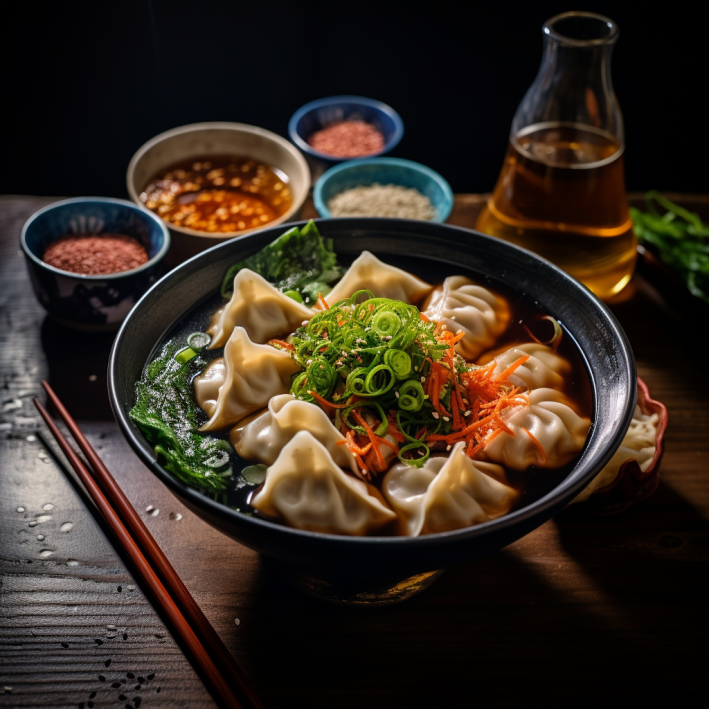

Your written report should include both code, output and written text summaries of the following:

Data Validation:
Describe validation and cleaning steps for every column in the data
Exploratory Analysis:
Include two different graphics showing single variables only to demonstrate the characteristics of data
Include at least one graphic showing two or more variables to represent the relationship between features
Describe your findings
Model Development
Include your reasons for selecting the models you use as well as a statement of the problem type
Code to fit the baseline and comparison models
Model Evaluation
Describe the performance of the two models based on an appropriate metric
Business Metrics
Define a way to compare your model performance to the business
Describe how your models perform using this approach
Final summary including recommendations that the business should undertak

From: Stef To: Head of Data Science Subject: Report on the assigned project

1) Data Validation 

First, the data contains 52 NaN values in calories, carbohydrate, sugar, protein. I tried to use Median and Mode, however it didn't work out well, so I abandoned the idea as the results of the model turned out to be worse, so the decision was to drop 52 missing rows. 

High traffic also has missing values but in this case, it is not missing at random, so I just replaced NA values with Not High. 

Backlog of changes: calories - NA rows, extreme outliers (Q3 + 3 IQR) were capped, scaled using MinMax carbohydrate - NA rows dropped, extreme outliers (Q3 + 3 IQR) were capped, scaled using MinMax sugar 

- NA rows dropped, extreme outliers (Q3 + 3 IQR) were capped, scaled using MinMax protein - NA rows dropped, extreme outliers (Q3 + 3 IQR) were capped, scaled using MinMax category 

- 'Chicken Breast' values for changed to 'Chicken', then columns were one hot encoded servings 
  - 2 values contained 'as a snack', they belonged to Lunch/Snack category so 'as a snack' was removed, the column was transformed to float 64 
- 
high_traffic 
- - NaN values were replaced with 'not high' and then changed to 1 - high, 0 - not high

# Data Science Professional 

# Data Validation 
This data set has 947 rows, 8 columns. 
I have validated all variables and I have made several changes after validation: 

 replace null values in high_traffic with "Low".
 mean fill of 52 rows for 

 - recipe: 947 unique identifiers without missing values. No cleaning is needed
 - calories: 895 non-null values. I fill 52 missed values with the mean grouped by category and servings.
 - carbohydrate: 895 non-null values. I fill 52 missed values with the mean grouped by category and servings.
 - sugar: 895 non-null values. I fill 52 missed values with the mean grouped by category and servings.
 - protein: 895 non-null values. I fill 52 missed values with the mean grouped by category and servings.
 - category: 11 unique values without missing values, whereas there were 10 values in the description. 'Chicken Breast' is united with the 'Chicken'.
 - servings: 6 unique values without missing values. By description, it should be numeric variable, but now it's character. Has two extra values: '4 as a snack' and '6 as a snack'. I united them with '4' and '6' and changed the column's type to integer.
high_traffic: only 1 non-null value ("High"). Replaced null values with "Low".

In [198]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from scipy.stats import ttest_ind

In [199]:
df = pd.read_csv("recipe_site_traffic_2212.csv")
df

recipe  calories  carbohydrate  sugar  protein      category servings  \
0         1       NaN           NaN    NaN      NaN          Pork        6   
1         2     35.48         38.56   0.66     0.92        Potato        4   
2         3    914.28         42.68   3.09     2.88     Breakfast        1   
3         4     97.03         30.56  38.63     0.02     Beverages        4   
4         5     27.05          1.85   0.80     0.53     Beverages        4   
..      ...       ...           ...    ...      ...           ...      ...   
942     943   1161.00          5.31  22.39    44.22  Lunch/Snacks        2   
943     944       NaN           NaN    NaN      NaN        Potato        2   
944     945    951.74         29.42   3.57    13.87          Pork        2   
945     946    266.61         35.77   0.97     8.07        Potato        6   
946     947    184.56         45.21   6.20     0.03     Beverages        4   

    high_traffic  
0           High  
1           High  
2            NaN  
3           High  
4            NaN  
..           ...  
942          NaN  
943         High  
944         High  
945         High  
946          NaN  

[947 rows x 8 columns]

In [200]:
# Set index as recipe
df = df.set_index('recipe')

In [201]:
# get statistical summary
df.describe()

calories  carbohydrate       sugar     protein
count   895.000000    895.000000  895.000000  895.000000
mean    435.939196     35.069676    9.046547   24.149296
std     453.020997     43.949032   14.679176   36.369739
min       0.140000      0.030000    0.010000    0.000000
25%     110.430000      8.375000    1.690000    3.195000
50%     288.550000     21.480000    4.550000   10.800000
75%     597.650000     44.965000    9.800000   30.200000
max    3633.160000    530.420000  148.750000  363.360000

In [202]:
# Check for missing values and data types
missing_values = df.isnull().sum()
data_types = df.dtypes

missing_values, data_types

(calories         52
 carbohydrate     52
 sugar            52
 protein          52
 category          0
 servings          0
 high_traffic    373
 dtype: int64,
 calories        float64
 carbohydrate    float64
 sugar           float64
 protein         float64
 category         object
 servings         object
 high_traffic     object
 dtype: object)

| Missing Values | Columns                                                |
|-------------|---------------------------------------------------------|
| 52   | </br> calories, carbohydrate, sugar, and protein columns. |
| 373        |  </br>high_traffic  |


Data Types:
 - calories, carbohydrate, sugar, and protein are of type float, which is also appropriate for these columns.
 - category and high_traffic are of type object (likely strings), which is expected.
 - servings is of type object, which might be a *concern* if we expect it to be numerical.

In [203]:
#replace NaN in high Traffic with Low
df['high_traffic'].fillna('Low', inplace=True)

In [204]:
# Check the number of rows in the dataset
total_rows = len(df)

# Calculate the proportion of missing values for affected columns
missing_proportions = missing_values / total_rows

total_rows, missing_proportions[['calories', 'carbohydrate', 'sugar', 'protein', 'high_traffic']]


(947,
 calories        0.054910
 carbohydrate    0.054910
 sugar           0.054910
 protein         0.054910
 high_traffic    0.393875
 dtype: float64)

For the columns calories, carbohydrate, sugar, and protein, we can either:
Fill the missing values with the mean or median of the respective column.
Remove the rows with missing values.

Before making decisions, it might be helpful to know the size of the dataset and the proportion of missing values. Let's check the number of rows in the dataset and the proportion of missing values in the affected columns.



For high_traffic, we can replace the NaN values with 'Low' to indicate non-high traffic.

In the current context, given that only about 5.49% of data is missing in some columns, it makes sense to impute them (using the median, mean), but both show the model performance is not performing well. So we disregard the option and drop them eventually 

In [205]:
# impute with simpleImputer the mean for calories, carbohydrate, sugar, and protein
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df[['calories', 'carbohydrate', 'sugar', 'protein']] = imputer.fit_transform(df[['calories', 'carbohydrate', 'sugar', 'protein']])
df[['calories', 'carbohydrate', 'sugar', 'protein']]
df.isnull().sum()





calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64

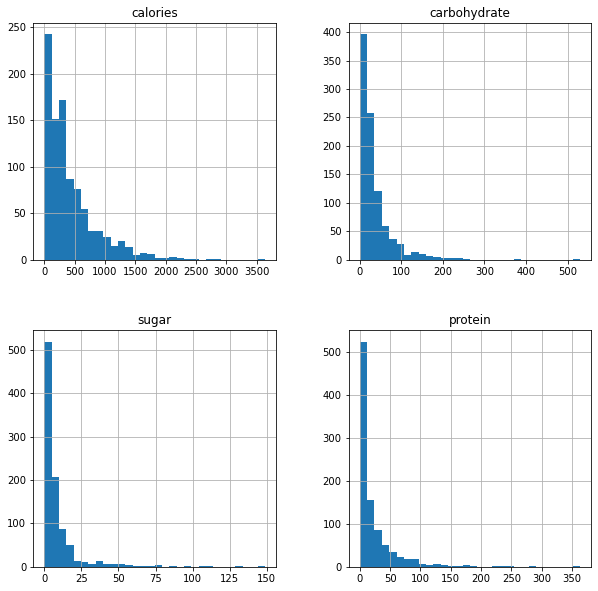

In [206]:
#plot all columns to see the distribution
df.hist(figsize=(10,10), bins=30)
plt.show()

Description of Findings (Histogram for Calories):

The majority of recipes have caloric content ranging between approximately 0 to 200 calories.
The distribution is right-skewed, meaning there are a few recipes with a much higher caloric content that extends towards the right tail.
There's a noticeable peak around the 100-150 calorie range, suggesting that many recipes fall within this caloric content.

Let's eximine the data and unique values 

In [207]:
# Check unique values in 'category', 'servings', and 'high_traffic' columns
category_unique_values = df['category'].unique()
servings_unique_values = df['servings'].unique()
high_traffic_unique_values = df['high_traffic'].unique()

category_unique_values, servings_unique_values, high_traffic_unique_values


(array(['Pork', 'Potato', 'Breakfast', 'Beverages', 'One Dish Meal',
        'Chicken Breast', 'Lunch/Snacks', 'Chicken', 'Vegetable', 'Meat',
        'Dessert'], dtype=object),
 array(['6', '4', '1', '2', '4 as a snack', '6 as a snack'], dtype=object),
 array(['High', 'Low'], dtype=object))

category:
 - The values seem consistent, and there aren't any evident spelling mistakes but Chicken Breast and Chicken could be put together.

servings:
- We see values like '4 as a snack' and '6 as a snack'. These entries have additional text, which is likely why the column is of type 'object'. We might want to clean these values to extract the numerical part and convert the entire column to a numerical type.
  
high_traffic:
- The values are either 'High' or NaN (missing). If this column is supposed to indicate high traffic, we might want to replace NaN with something like 'Low' or another appropriate value.


In [208]:
# Chicken and Chicken Breast can be put together, replace Chicken Breast with Chicken
df['category'].replace('Chicken Breast', 'Chicken', inplace=True)

In [209]:
def determine_healthiness(row):
    if row['category'] == 'Vegetable':
        return 1
    elif (row['calories'] <= 400 and 
          row['carbohydrate'] >= 15 and 
          row['carbohydrate'] <= 80 and 
          row['sugar'] <= 10 and 
          row['protein'] >= 10):
        return 1
    else:
        return 0

# Apply the function to each row of the dataframe
df['healthy'] = df.apply(determine_healthiness, axis=1)





In [210]:
# Extract numerical values from the 'servings' column and convert to integer
df['servings'] = df['servings'].str.extract('(\d+)').astype(int)

# Check the unique values in 'servings' after cleaning
servings_unique_values_cleaned = df['servings'].unique()
servings_unique_values_cleaned


array([6, 4, 1, 2])

In [211]:
df['category'].unique()


array(['Pork', 'Potato', 'Breakfast', 'Beverages', 'One Dish Meal',
       'Chicken', 'Lunch/Snacks', 'Vegetable', 'Meat', 'Dessert'],
      dtype=object)

In [212]:
#Difficulty 

category_points = {'Beverages': 1, 'Breakfast': 1, 'Chicken': 3, 'Dessert': 4,
                   'Lunch/Snacks': 2, 'Meat': 4, 'One Dish Meal': 3, 'Pork': 4, 'Potato': 1, 'Vegetable': 1}

# Create a dictionary to map servings to difficulty points

# Create a new column "difficulty" by mapping the category and servings to their corresponding points
df['difficulty'] = df['category'].map(category_points) + df['servings']
df[['difficulty','high_traffic']].groupby('difficulty').value_counts()

difficulty  high_traffic
2           Low              39
            High             29
3           High             54
            Low              32
4           High             34
            Low              30
5           High            147
            Low             103
6           High             56
            Low              26
7           High             88
            Low              84
8           High             96
            Low              28
9           High             28
            Low              17
10          High             42
            Low              14
dtype: int64

In [213]:
high_traffic_df = df[df['high_traffic'] == 'High']
low_traffic_df = df[df['high_traffic'] == 'Low']


t, p = ttest_ind(high_traffic_df['difficulty'], low_traffic_df['difficulty'])
print("t-statistic for difficulty: ", t)
print("p-value for difficulty: ", p,'\n')

t-statistic for difficulty:  3.6714170673806175
p-value for difficulty:  0.00025472839569389607 



In [214]:
def rank_difficulty(value):
    if 2 <= value <= 4:
        return 1  # Easy
    elif 5 <= value <= 7:
        return 2  # Medium
    elif 8 <= value <= 10:
        return 3  # Hard
    else:
        return None  # For values outside the range or missing data

df['difficulty'] = df['difficulty'].apply(rank_difficulty)


In [215]:
df[['difficulty','high_traffic']].groupby('difficulty').value_counts()


difficulty  high_traffic
1           High            117
            Low             101
2           High            291
            Low             213
3           High            166
            Low              59
dtype: int64

In [216]:
high_traffic_df = df[df['high_traffic'] == 'High']
low_traffic_df = df[df['high_traffic'] == 'Low']


t, p = ttest_ind(high_traffic_df['difficulty'], low_traffic_df['difficulty'])
print("t-statistic for difficulty: ", t)
print("p-value for difficulty: ", p,'\n')

t-statistic for difficulty:  4.391914983879212
p-value for difficulty:  1.2504896418730975e-05 



It's very obvious that the p-value is less than 0.05, which is commonly used as a threshold for determining statistical significance. This indicates that there is a statistically significant difference in means of these features between high traffic and low traffic recipes. so difficulty of the recipe may affect the traffic in some way

Now I will divide the difficulty into 3 groups:

from 2 to 4 is easy
from 4 to 7 is medium
from 7 to 10 is hard

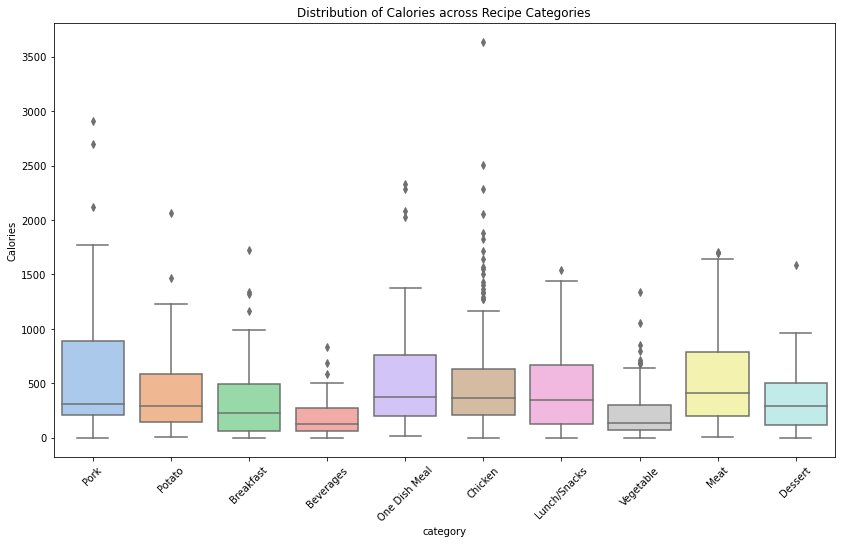

In [217]:
# Box plot for 'calories' across different 'categories'
plt.figure(figsize=(14, 8))
sns.boxplot(x=df['category'], y=df['calories'], palette="pastel")
plt.title('Distribution of Calories across Recipe Categories')
plt.xlabel('category')
plt.ylabel('Calories')
plt.xticks(rotation=45)
plt.show()

<AxesSubplot:title={'center':'Count plot category by traffic'}, xlabel='category', ylabel='count'>

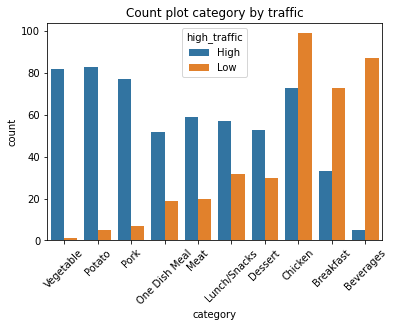

In [218]:
# get countplot to check relationship between high traffic and category
plt.title('Count plot category by traffic')
plt.figsize=(15,15)
plt.xticks(rotation=45)
sns.countplot(x=df['category'].sort_values(ascending=False), hue =df['high_traffic'])

Box Plot for Calories across Categories:

The "Meat" category tends to have the highest median caloric content, with a broad interquartile range, indicating a wide variety of meat dishes in terms of their caloric content.
"Beverages" have the lowest median caloric content, which is expected since drinks typically have fewer calories than solid foods.
There's noticeable variation in caloric content within categories like "One Dish Meal", "Chicken", and "Dessert", as indicated by the widths of their boxes and the lengths of their whiskers.

#The servings column has been cleaned, and it now contains only the numerical values: 

<AxesSubplot:xlabel='servings', ylabel='count'>

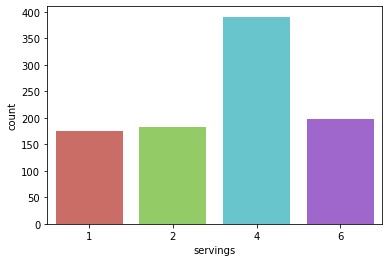

In [219]:
# servings plot
sns.countplot(x='servings', data=df, palette='hls')

<AxesSubplot:xlabel='servings'>

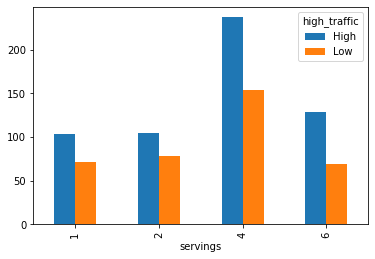

In [220]:
#bar chart of servings with high traffic
pd.crosstab(df.servings, df.high_traffic).plot(kind='bar')

In [221]:
df['high_traffic'].fillna('Low', inplace=True)

# drop all other missing values
df.dropna(inplace=True)

In [222]:
# count healthy 
df[df['healthy']==1].value_counts(['high_traffic'])

high_traffic
High            175
Low              59
dtype: int64

In [223]:
# percentage healthy of total rows
df[df['healthy']==1].value_counts(['high_traffic'])/len(df)

high_traffic
High            0.184794
Low             0.062302
dtype: float64

In [224]:
#check for missing values
df.isnull().sum()

calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
healthy         0
difficulty      0
dtype: int64

In [225]:
df.columns

Index(['calories', 'carbohydrate', 'sugar', 'protein', 'category', 'servings',
       'high_traffic', 'healthy', 'difficulty'],
      dtype='object')

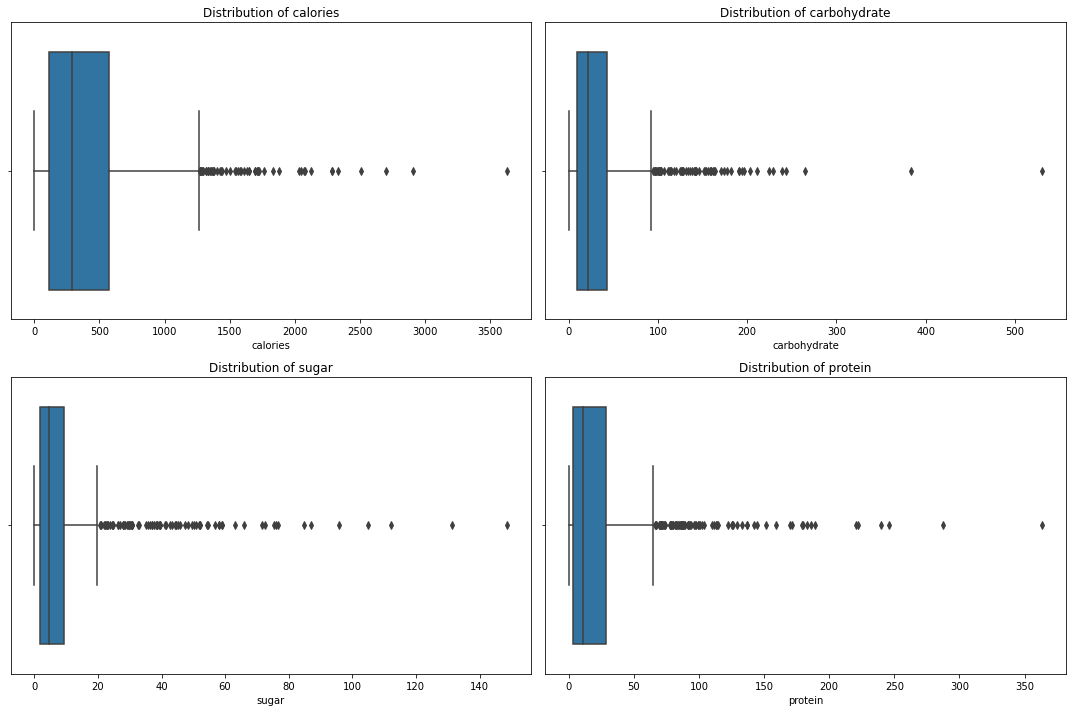

In [226]:
import seaborn as sns
import matplotlib.pyplot as plt

# Columns to visualize for potential outliers
columns_to_check = ['calories', 'carbohydrate', 'sugar', 'protein']

plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

The boxplots clearly indicate the presence of outliers in the columns calories, carbohydrate, sugar, and protein. These outliers could potentially be the cause of the error when trying to standardize the data.

To handle these outliers, we can employ one of the following strategies:

Capping: Replace outlier values with the boundary values (either the 1st or 3rd quartile values depending on whether it's a lower or upper outlier).
Transformation: Apply transformations like log transformation to reduce the effect of outliers.
Removal: Remove records with outlier values.
Given the importance of not losing data, especially in this context where we are trying to predict high traffic recipes, I recommend using the capping method. This method will ensure we retain all records while minimizing the influence of extreme values.



In [228]:
df.shape

(947, 9)

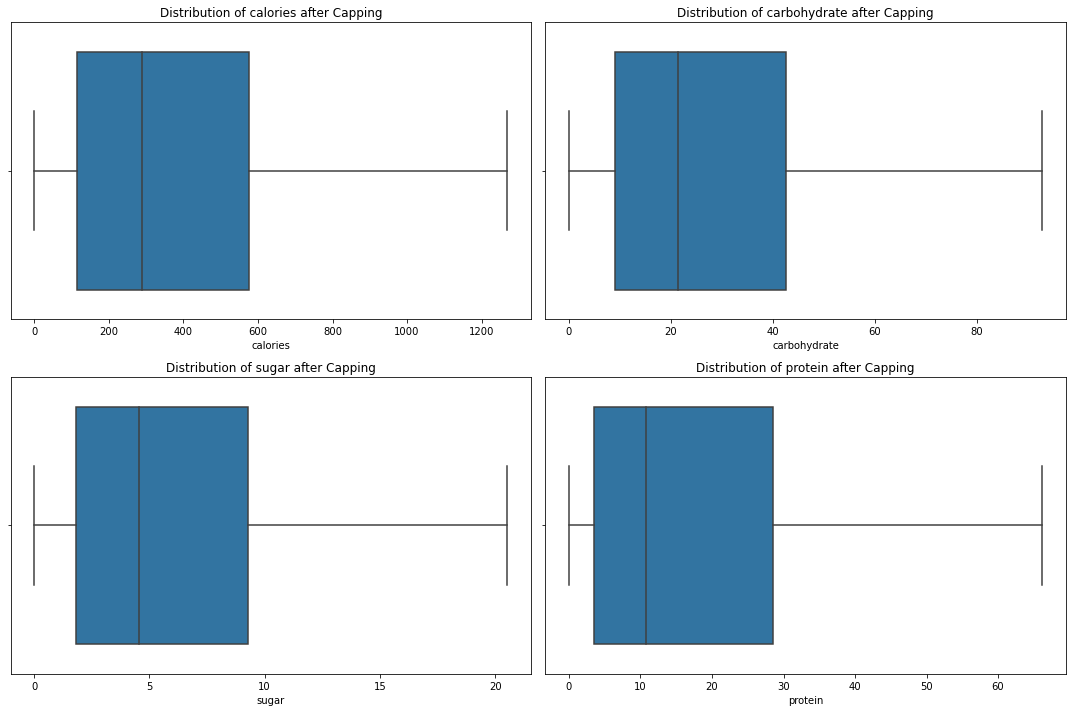

In [229]:
# Capping outliers based on the IQR method
for col in columns_to_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Replace outliers with boundary values
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

# Visualize the distributions after capping
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'Distribution of {col} after Capping')

plt.tight_layout()
plt.show()


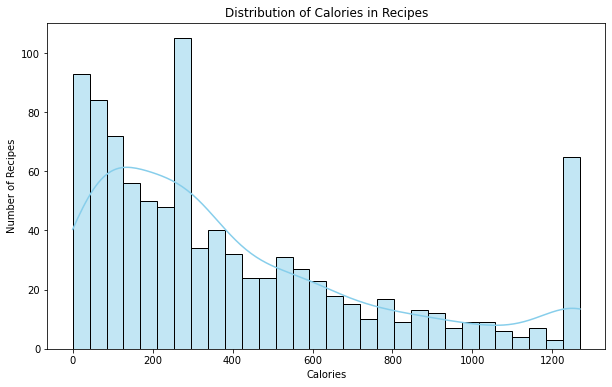

In [232]:
#show histogram of calories
plt.figure(figsize=(10, 6))
sns.histplot(df['calories'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Calories in Recipes')
plt.xlabel('Calories')
plt.ylabel('Number of Recipes')
plt.show()

In [233]:
import numpy as np
import sklearn

print("Numpy version:", np.__version__)
print("Sklearn version:", sklearn.__version__)


Numpy version: 1.21.6
Sklearn version: 1.3.0


In [234]:
#Import the PowerTransformer
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
df[['pt_calories', 'pt_carbohydrate', 'pt_sugar', 'pt_protein']] = pt.fit_transform(df[['calories', 'carbohydrate', 'sugar', 'protein']])


# log transformation of 'calories', 'sugar','carbohydrate','protein'
df['log_calories'] = np.log(df['calories'])# remove
df['log_sugar'] = np.log(df['sugar']) # remove
df['log_carbohydrates'] = np.log(df['carbohydrate'])
df['log_protein'] = np.log1p(df['protein'])


In [235]:
# test for normality
from scipy.stats import shapiro

# Testing for normality 'log_calories', 'log_sugar'
columns_to_test = ['pt_calories', 'pt_carbohydrate', 'pt_sugar', 'pt_protein']

for column in columns_to_test:
    stat, p = shapiro(df[column])
    print(f"Shapiro-Wilk Test for {column}:")
    print(f"Statistic = {stat:.5f}, p-value = {p:.5f}")
    if p > 0.05:
        print(f"{column} looks Gaussian (fail to reject H0)\n")
    else:
        print(f"{column} does not look Gaussian (reject H0)\n")

Shapiro-Wilk Test for pt_calories:
Statistic = 0.98211, p-value = 0.00000
pt_calories does not look Gaussian (reject H0)

Shapiro-Wilk Test for pt_carbohydrate:
Statistic = 0.97679, p-value = 0.00000
pt_carbohydrate does not look Gaussian (reject H0)

Shapiro-Wilk Test for pt_sugar:
Statistic = 0.96631, p-value = 0.00000
pt_sugar does not look Gaussian (reject H0)

Shapiro-Wilk Test for pt_protein:
Statistic = 0.95953, p-value = 0.00000
pt_protein does not look Gaussian (reject H0)



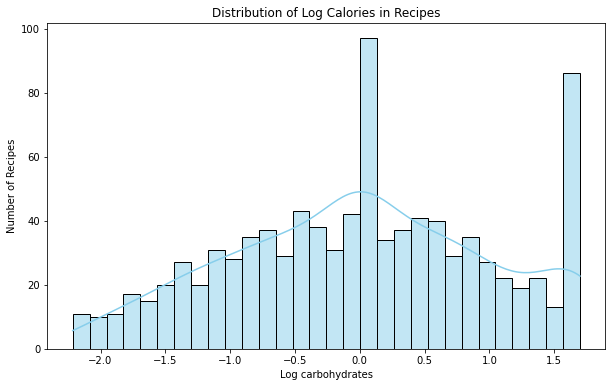

In [236]:
# Histogram for 'log_calories'
plt.figure(figsize=(10, 6))
sns.histplot(df['pt_carbohydrate'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Log Calories in Recipes')
plt.xlabel('Log carbohydrates')
plt.ylabel('Number of Recipes')
plt.show()

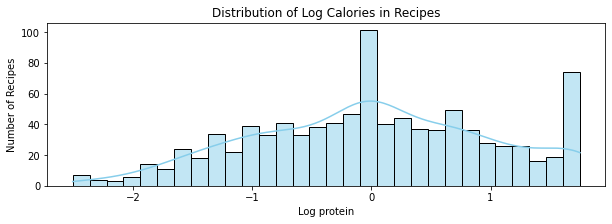

In [237]:
# Histogram for 'log_calories'
plt.figure(figsize=(10, 3))
sns.histplot(df['pt_calories'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Log Calories in Recipes')
plt.xlabel('Log protein')
plt.ylabel('Number of Recipes')
plt.show()

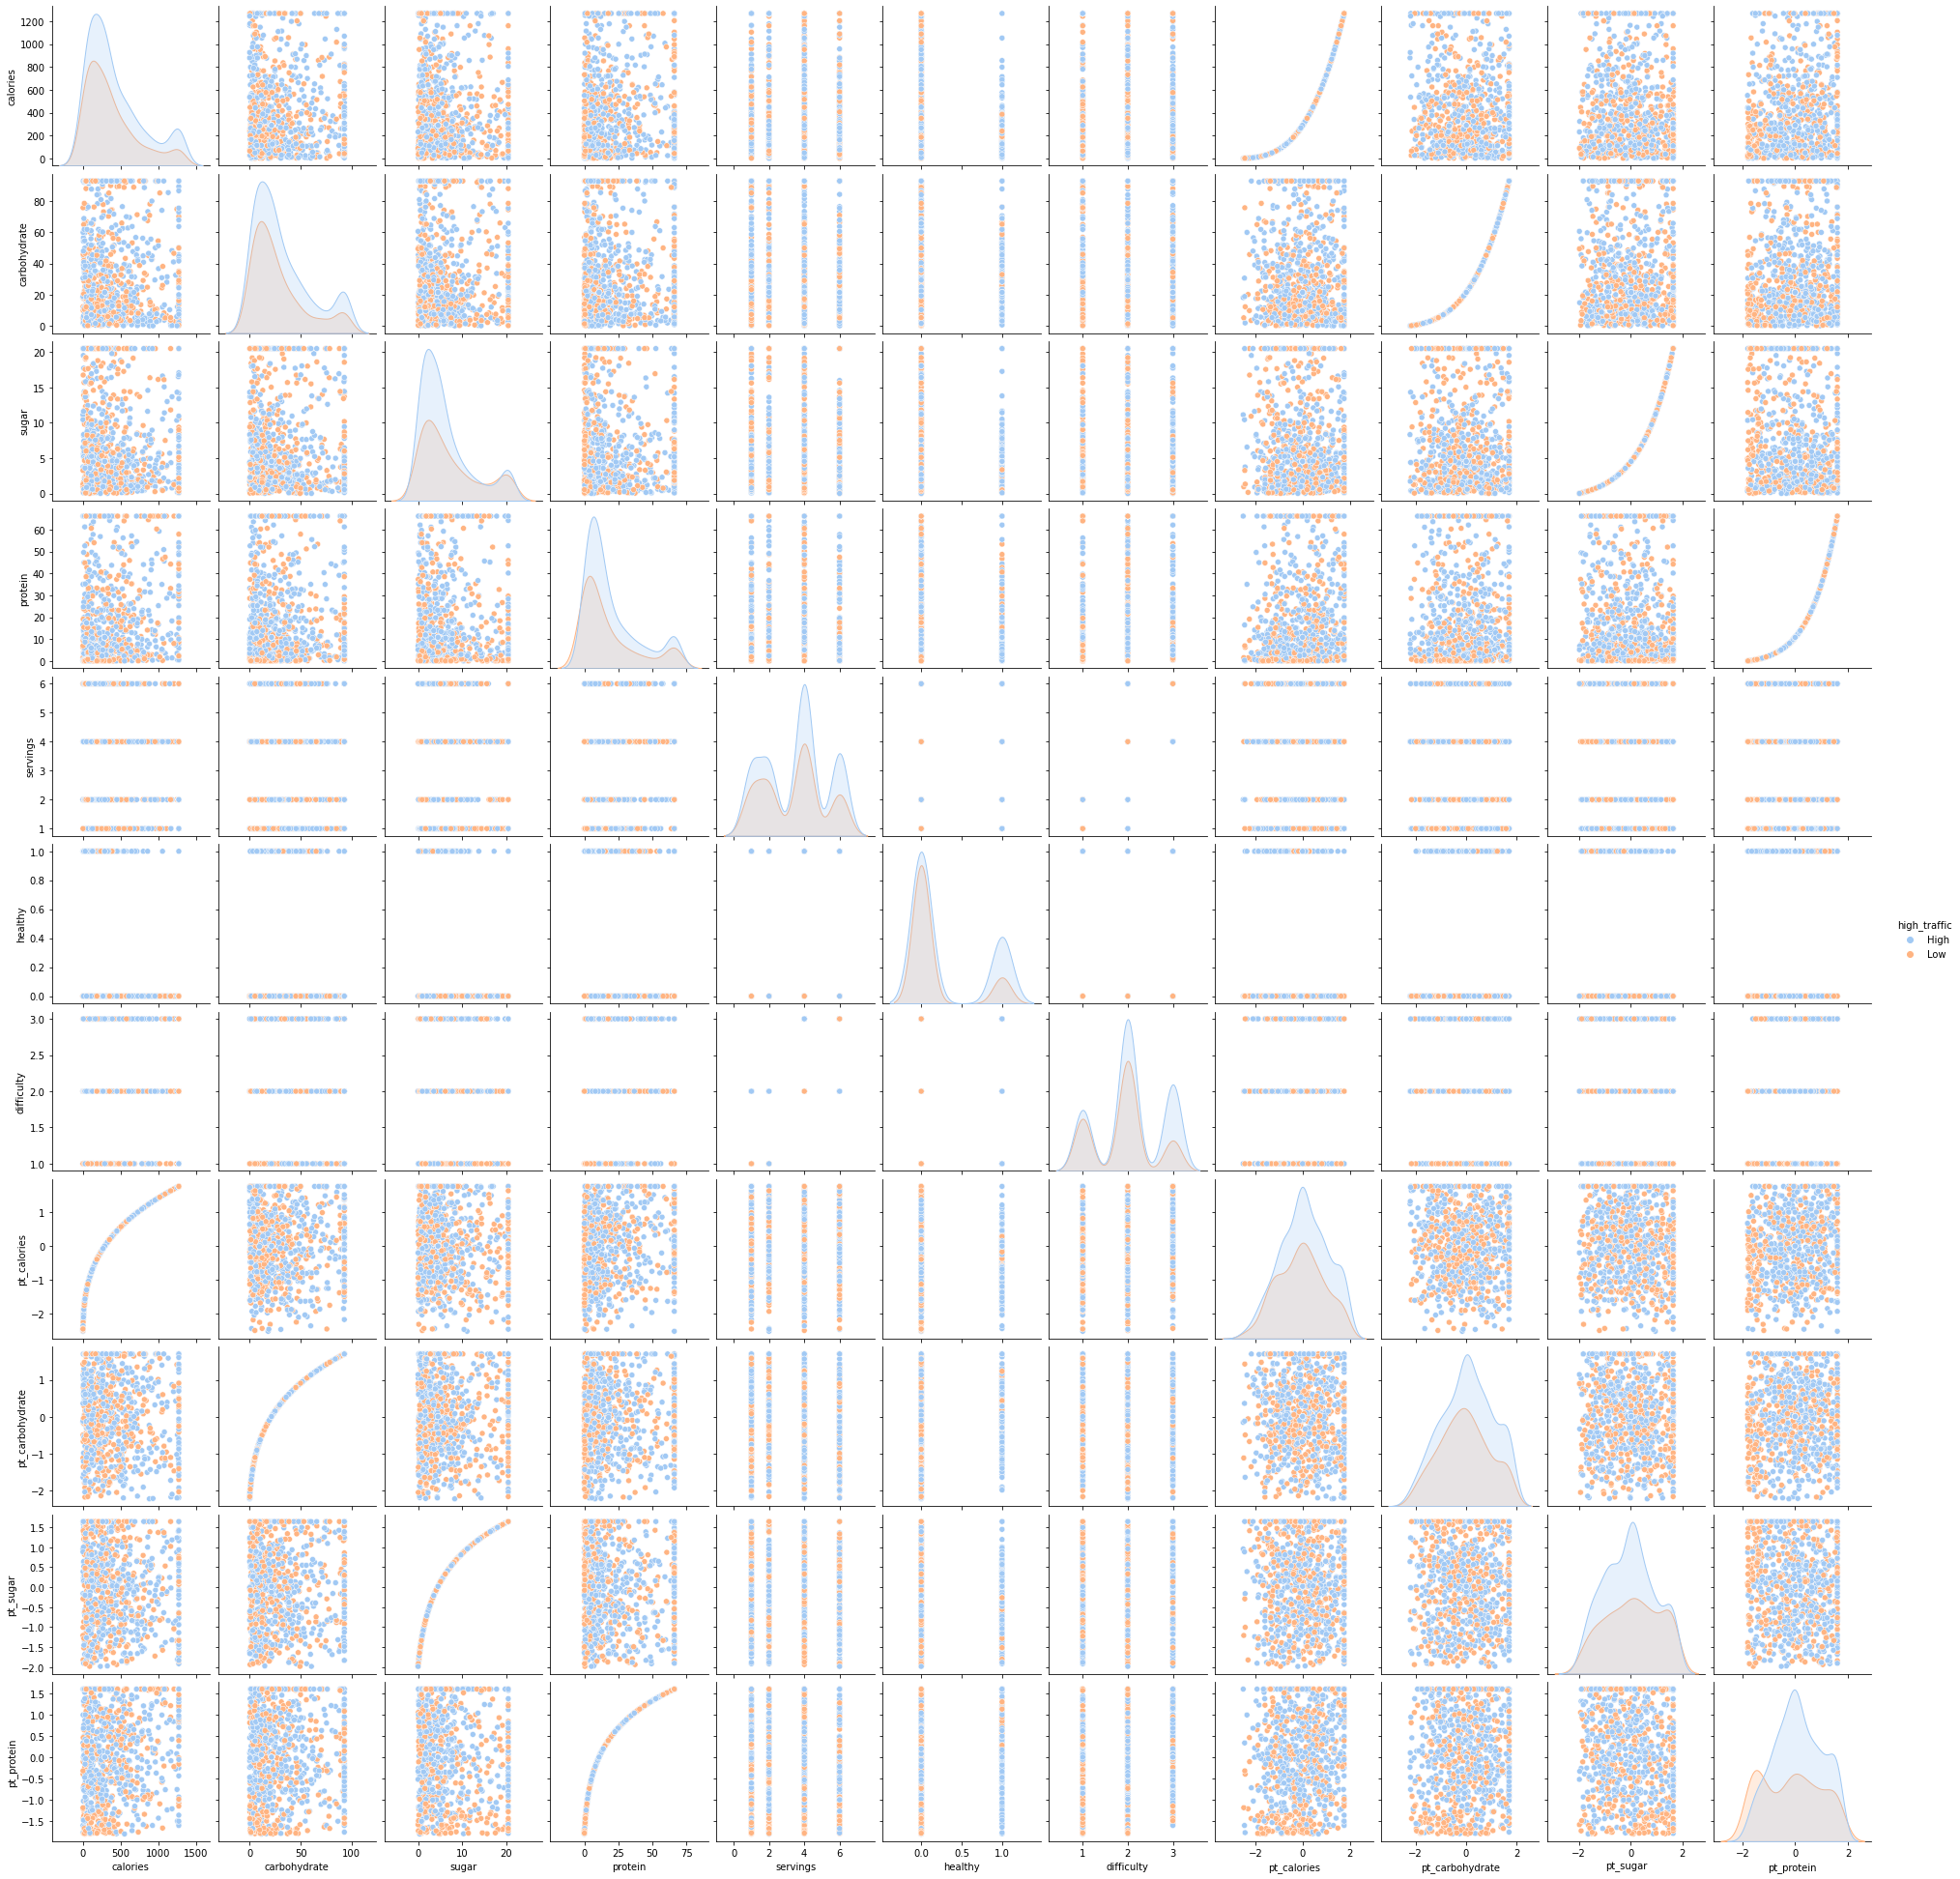

In [238]:
#searborn pairplot
sns.pairplot(df, hue = 'high_traffic', palette="pastel")
plt.show()

In [239]:
df.columns

Index(['calories', 'carbohydrate', 'sugar', 'protein', 'category', 'servings',
       'high_traffic', 'healthy', 'difficulty', 'pt_calories',
       'pt_carbohydrate', 'pt_sugar', 'pt_protein'],
      dtype='object')

In [240]:
# use statistcal test t-test to compare means of high traffic and low traffic in calories, carbohydrates, sugar, and protein
from scipy.stats import ttest_ind

# t-test for 'calories'
high_traffic_calories = df[df['high_traffic'] == 'High']['pt_calories']
low_traffic_calories = df[df['high_traffic'] == 'Low']['pt_calories']

ttest_ind(high_traffic_calories, low_traffic_calories)

# t-test for 'carbohydrate'
high_traffic_carbohydrate = df[df['high_traffic'] == 'High']['pt_carbohydrate']
low_traffic_carbohydrate = df[df['high_traffic'] == 'Low']['pt_carbohydrate']

ttest_ind(high_traffic_carbohydrate, low_traffic_carbohydrate)

# t-test for 'sugar'
high_traffic_sugar = df[df['high_traffic'] == 'High']['pt_sugar']
low_traffic_sugar = df[df['high_traffic'] == 'Low']['pt_sugar']

ttest_ind(high_traffic_sugar, low_traffic_sugar)

# t-test for 'protein'
high_traffic_protein = df[df['high_traffic'] == 'High']['pt_protein']
low_traffic_protein = df[df['high_traffic'] == 'Low']['pt_protein']

ttest_ind(high_traffic_protein, low_traffic_protein)

# print t-statistic and p-value for each variable
print('Calories: ', ttest_ind(high_traffic_calories, low_traffic_calories))
print('Carbohydrate: ', ttest_ind(high_traffic_carbohydrate, low_traffic_carbohydrate))
print('Sugar: ', ttest_ind(high_traffic_sugar, low_traffic_sugar))
print('Protein: ', ttest_ind(high_traffic_protein, low_traffic_protein))

Calories:  Ttest_indResult(statistic=2.0541995329156375, pvalue=0.04023099314711376)
Carbohydrate:  Ttest_indResult(statistic=1.8262981052884302, pvalue=0.0681207552159238)
Sugar:  Ttest_indResult(statistic=-2.100555484409667, pvalue=0.03594447777576452)
Protein:  Ttest_indResult(statistic=3.778427760646781, pvalue=0.00016770038234075908)


In [241]:
from scipy.stats import chi2_contingency,ttest_ind

contingency_table = pd.crosstab(df['category'], df['high_traffic'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
chi2, p

(318.2935223075692, 3.417304408371102e-63)

the chi-squared statistic is 300.1309861002327, and the p-value below 0.05  means that we can reject the null hypothesis and conclude that there is a significant association between the category of the recipe and the level of traffic to the website when the recipe was shown.

as you will see in the following plot that shows the number of recipes that belong to each category and whether they have high traffic or not. From this plot, we can conclude that there is a strong association between the category and high_traffic variables

In [242]:
contingency_table = pd.crosstab(df['servings'], df['high_traffic'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
chi2, p

(2.7369889309788054, 0.4339779666711946)

From the following plot and the p-value there is not significant association between the servings and the high traffic data

Model Fitting & Evaluation
It's clear that this is a classification problem. The target variable, high_traffic, is binary, indicating whether a recipe will lead to high traffic or not.

For the evaluation, I chose  Accuracy: This measures the proportion of correct predictions in the total predictions made. Given the goal of predicting high traffic recipes correctly 80% of the time, accuracy will be a primary metric of interest.

Approximately 59.78% of the recipes do not lead to high traffic (Class 0).

Approximately 40.22% of the recipes lead to high traffic (Class 1).

While there is a slight imbalance, it's not extremely skewed. However, even this degree of imbalance can sometimes lead to biased model predictions, especially if the model ends up favoring the majority class.

In [243]:
df

calories  carbohydrate  sugar  protein      category  servings  \
recipe                                                                   
1         288.55         21.48   4.55    10.80          Pork         6   
2          35.48         38.56   0.66     0.92        Potato         4   
3         914.28         42.68   3.09     2.88     Breakfast         1   
4          97.03         30.56  20.52     0.02     Beverages         4   
5          27.05          1.85   0.80     0.53     Beverages         4   
...          ...           ...    ...      ...           ...       ...   
943      1161.00          5.31  20.52    44.22  Lunch/Snacks         2   
944       288.55         21.48   4.55    10.80        Potato         2   
945       951.74         29.42   3.57    13.87          Pork         2   
946       266.61         35.77   0.97     8.07        Potato         6   
947       184.56         45.21   6.20     0.03     Beverages         4   

       high_traffic  healthy  difficulty  pt_calories  pt_carbohydrate  \
recipe                                                                   
1              High        1           3    -0.003243         0.009159   
2              High        0           2    -1.443906         0.613120   
3               Low        0           1     1.291509         0.727170   
4              High        0           2    -0.868755         0.362397   
5               Low        0           2    -1.569741        -1.643838   
...             ...      ...         ...          ...              ...   
943             Low        0           1     1.621900        -1.097059   
944            High        1           1    -0.003243         0.009159   
945            High        0           2     1.345365         0.322769   
946            High        0           2    -0.076326         0.530551   
947             Low        0           2    -0.393759         0.793137   

        pt_sugar  pt_protein  
recipe                        
1       0.021311   -0.001768  
2      -1.402296   -1.379026  
3      -0.340626   -0.877516  
4       1.643819   -1.798229  
5      -1.307421   -1.532845  
...          ...         ...  
943     1.643819    1.207910  
944     0.021311   -0.001768  
945    -0.209201    0.194031  
946    -1.201570   -0.218636  
947     0.330948   -1.791980  

[947 rows x 13 columns]

In [244]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures


In [132]:
df

calories  carbohydrate   sugar  protein       category  servings  \
recipe                                                                     
2          35.48         38.56   0.660     0.92         Potato         4   
3         914.28         42.68   3.090     2.88      Breakfast         1   
4          97.03         30.56  21.965     0.02      Beverages         4   
5          27.05          1.85   0.800     0.53      Beverages         4   
6         691.15          3.46   1.650    53.93  One Dish Meal         2   
...          ...           ...     ...      ...            ...       ...   
942       186.21         83.94   1.980    22.40        Chicken         4   
943      1161.00          5.31  21.965    44.22   Lunch/Snacks         2   
945       951.74         29.42   3.570    13.87           Pork         2   
946       266.61         35.77   0.970     8.07         Potato         6   
947       184.56         45.21   6.200     0.03      Beverages         4   

       high_traffic  healthy  difficulty  pt_calories  pt_carbohydrate  \
recipe                                                                   
2              High        0           2    -1.404698         0.589633   
3               Low        0           1     1.237640         0.697406   
4              High        0           2    -0.838442         0.351832   
5               Low        0           2    -1.529728        -1.604512   
6              High        0           2     0.898298        -1.308723   
...             ...      ...         ...          ...              ...   
942            High        0           2    -0.369002         1.479880   
943             Low        0           1     1.550196        -1.060291   
945            High        0           2     1.288662         0.314132   
946            High        0           2    -0.069181         0.511455   
947             Low        0           2    -0.376041         0.759632   

        pt_sugar  pt_protein  
recipe                        
2      -1.362823   -1.341279  
3      -0.323992   -0.847685  
4       1.633489   -1.758215  
5      -1.269094   -1.493788  
6      -0.822595    1.332138  
...          ...         ...  
942    -0.687507    0.570589  
943     1.633489    1.153160  
945    -0.196907    0.189983  
946    -1.164730   -0.207067  
947     0.321962   -1.751969  

[895 rows x 13 columns]

In [245]:
# convert with one hot encoding category,servings, high_traffic, use 0 and 1
df = pd.get_dummies(df, columns=['category', 'high_traffic'], drop_first=False)
df.head()

calories  carbohydrate  sugar  protein  servings  healthy  difficulty  \
recipe                                                                          
1         288.55         21.48   4.55    10.80         6        1           3   
2          35.48         38.56   0.66     0.92         4        0           2   
3         914.28         42.68   3.09     2.88         1        0           1   
4          97.03         30.56  20.52     0.02         4        0           2   
5          27.05          1.85   0.80     0.53         4        0           2   

        pt_calories  pt_carbohydrate  pt_sugar  ...  category_Chicken  \
recipe                                          ...                     
1         -0.003243         0.009159  0.021311  ...                 0   
2         -1.443906         0.613120 -1.402296  ...                 0   
3          1.291509         0.727170 -0.340626  ...                 0   
4         -0.868755         0.362397  1.643819  ...                 0   
5         -1.569741        -1.643838 -1.307421  ...                 0   

        category_Dessert  category_Lunch/Snacks  category_Meat  \
recipe                                                           
1                      0                      0              0   
2                      0                      0              0   
3                      0                      0              0   
4                      0                      0              0   
5                      0                      0              0   

        category_One Dish Meal  category_Pork  category_Potato  \
recipe                                                           
1                            0              1                0   
2                            0              0                1   
3                            0              0                0   
4                            0              0                0   
5                            0              0                0   

        category_Vegetable  high_traffic_High  high_traffic_Low  
recipe                                                           
1                        0                  1                 0  
2                        0                  1                 0  
3                        0                  0                 1  
4                        0                  1                 0  
5                        0                  0                 1  

[5 rows x 23 columns]

In [246]:
# replace False with 0 and True with 1 on all columns
df = df.replace(False, 0)
df = df.replace(True, 1)

In [247]:
#rename high_traffic_Low to high_traffic
df.rename(columns={'high_traffic_Low': 'high_traffic'}, inplace=True)

In [248]:
df.head()

calories  carbohydrate  sugar  protein  servings  healthy  difficulty  \
recipe                                                                          
1         288.55         21.48   4.55    10.80         6        1           3   
2          35.48         38.56   0.66     0.92         4        0           2   
3         914.28         42.68   3.09     2.88         1        0           1   
4          97.03         30.56  20.52     0.02         4        0           2   
5          27.05          1.85   0.80     0.53         4        0           2   

        pt_calories  pt_carbohydrate  pt_sugar  ...  category_Chicken  \
recipe                                          ...                     
1         -0.003243         0.009159  0.021311  ...                 0   
2         -1.443906         0.613120 -1.402296  ...                 0   
3          1.291509         0.727170 -0.340626  ...                 0   
4         -0.868755         0.362397  1.643819  ...                 0   
5         -1.569741        -1.643838 -1.307421  ...                 0   

        category_Dessert  category_Lunch/Snacks  category_Meat  \
recipe                                                           
1                      0                      0              0   
2                      0                      0              0   
3                      0                      0              0   
4                      0                      0              0   
5                      0                      0              0   

        category_One Dish Meal  category_Pork  category_Potato  \
recipe                                                           
1                            0              1                0   
2                            0              0                1   
3                            0              0                0   
4                            0              0                0   
5                            0              0                0   

        category_Vegetable  high_traffic_High  high_traffic  
recipe                                                       
1                        0                  1             0  
2                        0                  1             0  
3                        0                  0             1  
4                        0                  1             0  
5                        0                  0             1  

[5 rows x 23 columns]

In [249]:
#drop high_traffic_High
df.drop(columns=['high_traffic_High'], inplace=True)

In [250]:
#check for missing values
df.isnull().sum()

calories                  0
carbohydrate              0
sugar                     0
protein                   0
servings                  0
healthy                   0
difficulty                0
pt_calories               0
pt_carbohydrate           0
pt_sugar                  0
pt_protein                0
category_Beverages        0
category_Breakfast        0
category_Chicken          0
category_Dessert          0
category_Lunch/Snacks     0
category_Meat             0
category_One Dish Meal    0
category_Pork             0
category_Potato           0
category_Vegetable        0
high_traffic              0
dtype: int64

In [139]:
# drop calroies, sugar, carbohydrate, protein
#df.drop(['calories', 'sugar', 'carbohydrate', 'protein'], axis=1, inplace=True)

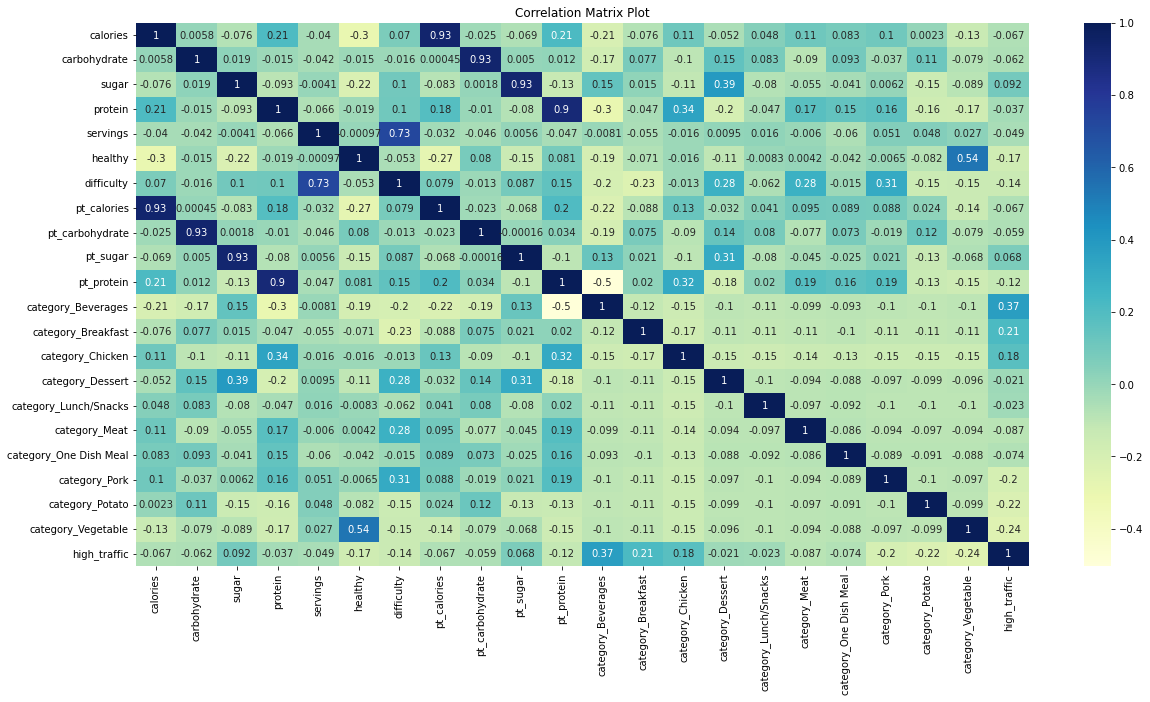

In [251]:
# show correlation matrix plot of all variables
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Matrix Plot")
plt.show()


In [252]:
# aboslute high correlation  values with 'high_traffic' above abs values 0.001
high_corr = df.corr()['high_traffic'].abs().sort_values(ascending=False)
high_corr = high_corr[high_corr > 0.001]
high_corr




high_traffic              1.000000
category_Beverages        0.370437
category_Vegetable        0.242208
category_Potato           0.220794
category_Breakfast        0.214204
category_Pork             0.198287
category_Chicken          0.175195
healthy                   0.166185
difficulty                0.141433
pt_protein                0.121994
sugar                     0.092399
category_Meat             0.086880
category_One Dish Meal    0.073573
pt_sugar                  0.068172
calories                  0.066761
pt_calories               0.066674
carbohydrate              0.062259
pt_carbohydrate           0.059305
servings                  0.048708
protein                   0.036630
category_Lunch/Snacks     0.022626
category_Dessert          0.020571
Name: high_traffic, dtype: float64

In [276]:
# find the most important features relative to target with SelectKBest

X = df.drop('high_traffic', axis=1)
y = df['high_traffic']


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


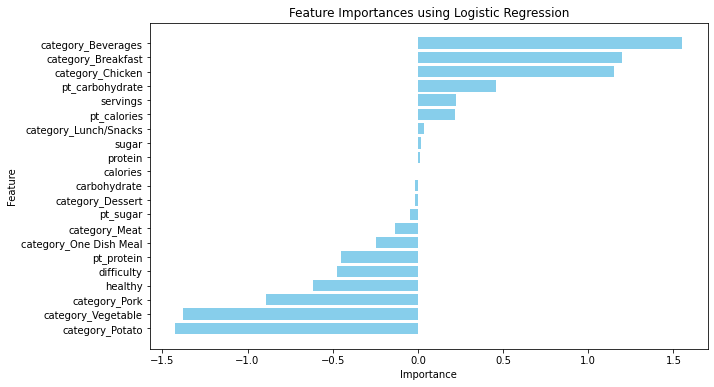

In [277]:
# Feature importance with logistic classifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Initialize the logistic regression
logreg = LogisticRegression()

# Fit the model
logreg.fit(X, y)

# Get the feature importances
feature_importances = logreg.coef_[0]

# Create a DataFrame for visualization
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10,6))
plt.barh(features_df['Feature'], features_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances using Logistic Regression')
plt.gca().invert_yaxis()  # Highest importances at the top
plt.show()


In [255]:
# rank all features in a table in absolute order of importance from the previous model
features_df['Importance'] = abs(features_df['Importance'])
features_df = features_df.sort_values(by='Importance', ascending=False)
features_df

Feature  Importance
11      category_Beverages    1.552589
19         category_Potato    1.425533
20      category_Vegetable    1.378920
12      category_Breakfast    1.195859
13        category_Chicken    1.151995
18           category_Pork    0.890186
5                  healthy    0.618486
6               difficulty    0.473447
8          pt_carbohydrate    0.459324
10              pt_protein    0.451389
17  category_One Dish Meal    0.245582
4                 servings    0.222269
7              pt_calories    0.217781
16           category_Meat    0.136891
9                 pt_sugar    0.044503
15   category_Lunch/Snacks    0.033886
2                    sugar    0.018244
14        category_Dessert    0.016841
1             carbohydrate    0.014262
3                  protein    0.013396
0                 calories    0.000533

In [278]:
# Drop  log_protein, log_carbohydrates, sugar, log_calories,  'carbohydrate', 'sugar'
df.drop([ 'protein','carbohydrate','sugar','calories'], axis=1, inplace=True)

In [146]:
#drop sugar
df.drop(columns=['servings'], inplace=True)

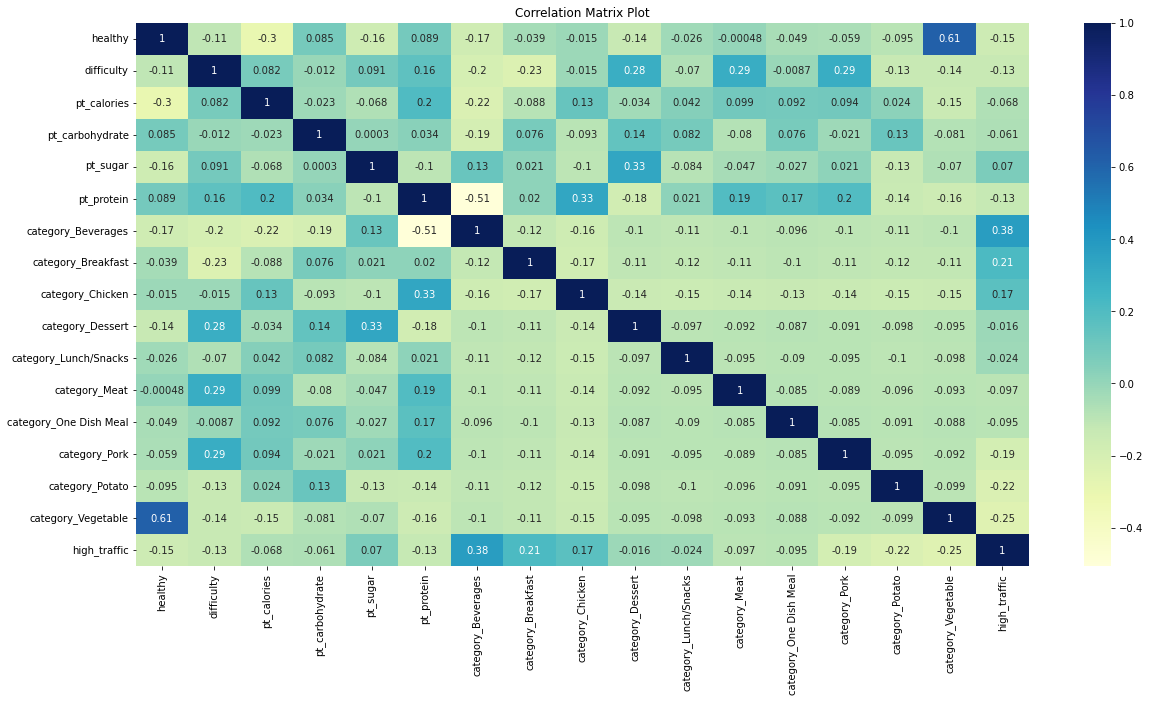

In [151]:
# show correlation matrix plot of all variables
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Matrix Plot")
plt.show()

In [ ]:
#Use sharply to see the best features


In [ ]:
df.info()

In [ ]:
#remove servings_2,servings_4,servings_6
#df.drop(['servings_6'], axis=1, inplace=True)

# Model Fitting and Evaluation 

Predicting whether a recipe will lead to high traffic is a binary classification problem in machine learning. Given the nature of our dataset and the need for interpretability, I am choosing the Logistic Regression model. Logistic Regression is suitable for binary outcomes and provides probabilities that can be interpreted and calibrated. The model also works well when there's a linear decision boundary between classes.

As a comparison model, I'm selecting the Random Forest classifier. Random Forest is an ensemble method that can capture complex relationships in the data without needing explicit feature engineering. It's robust to outliers and can handle imbalanced datasets by adjusting class weights or through bootstrapping.

For evaluation, given the class imbalance and the nature of our problem, I'm prioritizing the F1-Score and ROC-AUC. The F1-Score provides a balance between precision and recall, making it a more comprehensive metric than accuracy for imbalanced datasets. ROC-AUC, on the other hand, gives us insights into the model's capability to distinguish between recipes that lead to high traffic and those that don't. Additionally, we'll also monitor Accuracy, Precision, and Recall to ensure our model's predictions are both precise and comprehensive.

This text is adapted to describe the problem at hand, the chosen models, and the rationale behind the model choices and evaluation metrics.

# Prepare Data for Modelling 
To facilitate the prediction of whether a recipe will lead to high traffic, we selected features like calories, sugar, carbohydrates, and protein among others, with high_traffic as the target variable. To further refine our dataset for modeling, the following transformations were applied:

Standardization of Numeric Features: Given the varied scales of our numeric features, we standardized them to have a mean of 0 and a standard deviation of 1. This ensures that all features contribute equally to the model's performance.

Encoding Categorical Variables: Any categorical variables in our dataset were converted into numeric representations, ensuring our models can process them effectively.

Data Splitting: To evaluate our model's performance on unseen data, we split the dataset into a training set (to train the model) and a test set (to evaluate the model).



In [279]:
#import standard scaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#import train test split
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X = df.drop('high_traffic', axis=1)
y = df['high_traffic']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the features
#scaler = StandardScaler()
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [280]:
# Get the value counts for each class
class_counts = y.value_counts()

# Calculate the percentage distribution of each class
class_percentage = (class_counts / len(y)) * 100
class_percentage

0    60.61246
1    39.38754
Name: high_traffic, dtype: float64

In [281]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Esemble model , measure F1 score, precious, recall, accuracy
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

# Initialize and fit the baseline model: Logistic Regression
logreg = LogisticRegression(class_weight='balanced',penalty='l2',C=0.001)
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred_baseline = logreg.predict(X_test)

# Evaluate the performance of the baseline model
accuracy_baseline = f1_score(y_test, y_pred_baseline)
accuracy_baseline

0.6533864541832669

In [282]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

# Define the metrics
scoring_metrics = {
    'f1': 'f1',
    'f1_weighted': 'f1_weighted',
    'roc_auc': 'roc_auc',
    'neg_log_loss': 'neg_log_loss',
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'auc': 'roc_auc'
}

# Evaluate the model using cross-validation
scores = {}
for metric_name, metric in scoring_metrics.items():
    cv_score = cross_val_score(logreg, X_train, y_train, cv=5, scoring=metric)
    scores[metric_name] = cv_score.mean()

scores


{'f1': 0.6509935769418789,
 'f1_weighted': 0.7157992996631529,
 'roc_auc': 0.8017285854432081,
 'neg_log_loss': -0.6869870079704806,
 'accuracy': 0.7145933014354067,
 'precision': 0.6315278581068056,
 'recall': 0.6741654571843251,
 'auc': 0.8017285854432081}

In [283]:
# check classifcation model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_baseline))


              precision    recall  f1-score   support

           0       0.79      0.67      0.73       173
           1       0.59      0.73      0.65       112

    accuracy                           0.69       285
   macro avg       0.69      0.70      0.69       285
weighted avg       0.71      0.69      0.70       285



In [284]:
# build model 'LinearSVC' and measure F1 score, precious, recall, accuracy using cross validation
from sklearn.svm import LinearSVC

# Initialize and fit the model
lsvc = LinearSVC(class_weight='balanced')
lsvc.fit(X_train, y_train)

# Predict on the test set
y_pred_lsvc = lsvc.predict(X_test)

# Evaluate the performance of the model
accuracy_lsvc = f1_score(y_test, y_pred_lsvc)
accuracy_lsvc

# Evaluate the model using cross-validation
scores = {}
for metric_name, metric in scoring_metrics.items():
    cv_score = cross_val_score(lsvc, X_train, y_train, cv=5, scoring=metric)
    scores[metric_name] = cv_score.mean()

scores

# check classifcation model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lsvc))



/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppres

              precision    recall  f1-score   support

           0       0.84      0.59      0.69       173
           1       0.57      0.83      0.67       112

    accuracy                           0.68       285
   macro avg       0.71      0.71      0.68       285
weighted avg       0.73      0.68      0.69       285



/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppres

In [285]:
# bernoulli naive bayes classifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

# define model
model = BernoulliNB(alpha=0.255)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
# evaluate model
scores = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1)
# summarize performance
print('Mean F1: %.3f' % np.mean(scores))

#predict on test set
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# check classifcation model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scip

Mean F1: 0.658
              precision    recall  f1-score   support

           0       0.78      0.79      0.79       173
           1       0.67      0.66      0.67       112

    accuracy                           0.74       285
   macro avg       0.73      0.73      0.73       285
weighted avg       0.74      0.74      0.74       285



In [286]:
#SDG classifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

# define model
model = SGDClassifier()
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
# evaluate model
scores = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1)
# summarize performance
print('Mean F1: %.3f' % np.mean(scores))

#predict on test set
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# check classifcation model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


Mean F1: 0.556
              precision    recall  f1-score   support

           0       0.82      0.60      0.69       173
           1       0.56      0.80      0.66       112

    accuracy                           0.68       285
   macro avg       0.69      0.70      0.68       285
weighted avg       0.72      0.68      0.68       285



In [287]:
# Build a model with ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

# define model
model = ExtraTreesClassifier(n_estimators=250)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
# evaluate model
scores = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1)
# summarize performance
print('Mean F1: %.3f' % np.mean(scores))

#predict on test set
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# check classifcation model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))



Mean F1: 0.636
              precision    recall  f1-score   support

           0       0.76      0.75      0.76       173
           1       0.63      0.64      0.63       112

    accuracy                           0.71       285
   macro avg       0.70      0.70      0.70       285
weighted avg       0.71      0.71      0.71       285



In [288]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


rf=RandomForestClassifier()
param_grid = {'n_estimators': [10, 50, 100,150,200],
              'max_depth': [None, 5, 10]
              }
gs=GridSearchCV(rf,param_grid)
gs.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'n_estimators': [10, 50, 100, 150, 200]})

In [266]:
# check best parameters
gs.best_params_

{'max_depth': 10, 'n_estimators': 150}

In [289]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

y_pred = gs.predict(X_test)
acc = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("confussion matrix: ",conf_matrix)
print("accuarcy: ",acc)
print("precision: ", precision)
print("recall: ",recall)
print("f1: ",f1)

confussion matrix:  [[151  22]
 [ 54  58]]
accuarcy:  0.7333333333333333
precision:  0.725
recall:  0.5178571428571429
f1:  0.6041666666666666


In [290]:
# Build a model with GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

# define model
model = GradientBoostingClassifier(n_estimators=100, max_depth=1)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
# evaluate model
scores = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1)
# summarize performance
print('Mean F1: %.3f' % np.mean(scores))

#predict on test set
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# check classifcation model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


Mean F1: 0.684
              precision    recall  f1-score   support

           0       0.79      0.84      0.82       173
           1       0.73      0.65      0.69       112

    accuracy                           0.77       285
   macro avg       0.76      0.75      0.75       285
weighted avg       0.77      0.77      0.77       285



In [295]:
#Build model with XGBClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

# define model
model = XGBClassifier()
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
# evaluate model
scores = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1)
# summarize performance
print('Mean F1: %.3f' % np.mean(scores))

#predict on test set
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# check classifcation model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scip

Mean F1: 0.575
              precision    recall  f1-score   support

           0       0.73      0.73      0.73       173
           1       0.58      0.58      0.58       112

    accuracy                           0.67       285
   macro avg       0.65      0.65      0.65       285
weighted avg       0.67      0.67      0.67       285



In [292]:
# Esemble model SGDClassifier and BernoulliNB, measure F1 score, precious, recall, accuracy
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

# define the base models
models = list()
models.append(('SGDClassifier', SGDClassifier(loss='log_loss')))
#models.append(('LinearSVC', LinearSVC(class_weight='balanced')))
models.append(('BernoulliNB', BernoulliNB(alpha=0.255)))
models.append(('LogisticRegression', LogisticRegression(class_weight='balanced',penalty='l2',C=0.001)))
#models.append(('GradientBoost', GradientBoostingClassifier(n_estimators=100, max_depth=1)))

# define the voting ensemble
ensemble = VotingClassifier(estimators=models, voting='hard')
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
# evaluate the ensemble
scores = cross_val_score(ensemble, X, y, scoring='f1', cv=cv, n_jobs=-1)
# summarize performance
print('Mean F1: %.3f' % np.mean(scores))

#summarize AUC score
from sklearn.metrics import roc_auc_score
# evaluate each model in turn
results = []
names = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1 = roc_auc_score(y_test, y_pred)
    results.append(f1)
    names.append(name)
    print('%s: %f' % (name, f1))


#predict on test set
ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)  # Corrected this line

# check classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


Mean F1: 0.617
SGDClassifier: 0.748116
BernoulliNB: 0.726311
LogisticRegression: 0.701332
              precision    recall  f1-score   support

           0       0.78      0.77      0.77       173
           1       0.65      0.66      0.65       112

    accuracy                           0.73       285
   macro avg       0.71      0.71      0.71       285
weighted avg       0.73      0.73      0.73       285



In [ ]:
pip install h2o

     |████████████████████████████████| 257.4 MB 117 kB/s  eta 0:00:0107
  Created wheel for h2o: filename=h2o-3.44.0.1-py2.py3-none-any.whl size=257484167 sha256=79d42854bea281f1581975ceff75e527b846e78863918f9b87a971ba7a72ac5d
  Stored in directory: /Users/stephaniegessler/Library/Caches/pip/wheels/9f/5b/ad/cfb29d565700c5e2c2e395a6cd87e2dbaacc55864436098304
Successfully built h2o
Note: you may need to restart the kernel to use updated packages.


In [303]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()
h2o_df = h2o.H2OFrame(df)
# Convert the 'high_traffic' column to a factor (categorical variable)
h2o_df['high_traffic'] = h2o_df['high_traffic'].asfactor()

# Now, split the H2OFrame
train, test = h2o_df.split_frame(ratios=[0.8], seed=1)

# Continue with the rest of your code
aml = H2OAutoML(max_models=25, balance_classes=True, seed=1)
aml.train(training_frame=train, y='high_traffic')
lb = aml.leaderboard
lb.head(rows=lb.nrows)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  ---------------------------------------
H2O_cluster_uptime:         11 hours 45 mins
H2O_cluster_timezone:       Europe/Zurich
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.44.0.1
H2O_cluster_version_age:    1 day
H2O_cluster_name:           H2O_from_python_stephaniegessler_dy9dgg
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.133 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.9.12 final
--------------------------  ---------------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


model_id                                                     auc    logloss     aucpr    mean_per_class_error      rmse       mse
------------------------------------------------------  --------  ---------  --------  ----------------------  --------  --------
StackedEnsemble_BestOfFamily_1_AutoML_7_20231018_74225  0.824292   0.495448  0.749856                0.245418  0.406506  0.165248
StackedEnsemble_AllModels_1_AutoML_7_20231018_74225     0.822941   0.495578  0.745909                0.246593  0.407592  0.166131
DeepLearning_grid_3_AutoML_7_20231018_74225_model_1     0.818029   0.574495  0.755933                0.279723  0.425254  0.180841
GBM_grid_1_AutoML_7_20231018_74225_model_2              0.816806   0.509183  0.730621                0.247768  0.412953  0.17053
GLM_1_AutoML_7_20231018_74225                           0.81225    0.495943  0.729215                0.24348   0.408836  0.167147
GBM_grid_1_AutoML_7_20231018_74225_model_4              0.811263   0.521388  0.71164                 0.252467  0.417685  0.174461
DeepLearning_1_AutoML_7_20231018_74225                  0.805771   0.532729  0.732533                0.260338  0.423266  0.179154
GBM_grid_1_AutoML_7_20231018_74225_model_3              0.804295   0.524384  0.714728                0.281779  0.419758  0.176197
DeepLearning_grid_1_AutoML_7_20231018_74225_model_1     0.803292   0.609931  0.73298                 0.288651  0.443495  0.196688
GBM_2_AutoML_7_20231018_74225                           0.802342   0.528436  0.712081                0.274554  0.421879  0.177982
GBM_5_AutoML_7_20231018_74225                           0.801141   0.530225  0.721115                0.281896  0.423517  0.179366
XGBoost_grid_1_AutoML_7_20231018_74225_model_1          0.79878    0.533657  0.707246                0.270442  0.423287  0.179172
GBM_4_AutoML_7_20231018_74225                           0.798285   0.536163  0.709136                0.27332   0.424288  0.18002
DeepLearning_grid_2_AutoML_7_20231018_74225_model_1     0.795322   0.602518  0.711844                0.293351  0.438264  0.192075
DeepLearning_grid_1_AutoML_7_20231018_74225_model_2     0.794896   0.601171  0.722371                0.289415  0.43444   0.188738
GBM_3_AutoML_7_20231018_74225                           0.794423   0.536408  0.693713                0.300164  0.426398  0.181815
XGBoost_2_AutoML_7_20231018_74225                       0.789088   0.563213  0.690393                0.282953  0.433456  0.187884
DRF_1_AutoML_7_20231018_74225                           0.786985   0.627894  0.678099                0.285773  0.435264  0.189454
XGBoost_grid_1_AutoML_7_20231018_74225_model_2          0.779128   0.566966  0.682369                0.281602  0.43734   0.191267
XGBoost_3_AutoML_7_20231018_74225                       0.773012   0.587613  0.685104                0.308564  0.446236  0.199127
GBM_grid_1_AutoML_7_20231018_74225_model_1              0.771727   0.559016  0.673401                0.29711   0.437246  0.191184
XGBoost_grid_1_AutoML_7_20231018_74225_model_5          0.763999   0.617925  0.66296                 0.309211  0.452068  0.204366
XGBoost_1_AutoML_7_20231018_74225                       0.745752   0.59434   0.65614                 0.309563  0.450289  0.20276
XGBoost_grid_1_AutoML_7_20231018_74225_model_4          0.745561   0.578417  0.653502                0.280898  0.442777  0.196051
XGBoost_grid_1_AutoML_7_20231018_74225_model_3          0.743693   0.582973  0.652903                0.288064  0.443857  0.197009
XRT_1_AutoML_7_20231018_74225                           0.7265     0.655488  0.634489                0.338228  0.482169  0.232487
GBM_1_AutoML_7_20231018_74225                           0.704322   0.612082  0.633731                0.352444  0.459548  0.211185
[27 rows x 7 columns]

In [304]:
best_model = aml.get_best_model()
print(best_model)

Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_1_AutoML_7_20231018_74225


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       3/6
# GBM base models (used / total)           1/1
# XGBoost base models (used / total)       0/1
# DeepLearning base models (used / total)  1/1
# GLM base models (used / total)           1/1
# DRF base models (used / total)           0/2
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.09254312421641094
RMSE: 0.30420901402885964
LogLoss: 0.313691426144814
AUC: 0.96489147673

In [305]:
best_model.model_performance(test)

ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.16564156258547777
RMSE: 0.406990863024562
LogLoss: 0.5112758970127017
AUC: 0.8091787439613527
AUCPR: 0.7538315495733594
Gini: 0.6183574879227054
Null degrees of freedom: 194
Residual degrees of freedom: 191
Null deviance: 255.50944897780315
Residual deviance: 199.39759983495364
AIC: 207.39759983495364

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4477660751725827
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      99   27   0.2143   (27.0/126.0)
1      22   47   0.3188   (22.0/69.0)
Total  121  74   0.2513   (49.0/195.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.447766     0.657343  73
max f2                       0.11377      0.795181  138
max f0point5                 0.699554     0.746269  32
max accuracy                 0.699554     0.784615  32
max precision                0.950423     1         0
max recall                   0.00102877   1         190
max specificity              0.950423     1         0
max absolute_mcc             0.699554     0.524093  32
max min_per_class_accuracy   0.403589     0.695652  82
max mean_per_class_accuracy  0.525706     0.736888  58
max tns                      0.950423     126       0
max fns                      0.950423     68        0
max fps                      0.00101788   126       194
max tps                      0.00102877   69        190
max tnr                      0.950423     1         0
max fnr                      0.950423     0.985507  0
max fpr                      0.00101788   1         194
max tpr                      0.00102877   1         190

Gains/Lift Table: Avg response rate: 35.38 %, avg score: 36.53 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0102564                   0.936099           2.82609   2.82609            1                0.943337   1                           0.943337            0.0289855       0.0289855                  182.609   182.609            0.0289855
2        0.0205128                   0.932699           2.82609   2.82609            1                0.934934   1                           0.939136            0.0289855       0.057971                   182.609   182.609            0.057971
3        0.0307692                   0.928447           2.82609   2.82609            1                0.931753   1                           0.936675            0.0289855       0.0869565                  182.609   182.609            0.0869565
4        0.0410256                   0.927163           2.82609   2.82609            1                0.927885   1                           0.934477            0.0289855       0.115942                   182.609   182.609            0.115942
5        0.0512821                   0.925554           2.82609   2.82609            1                0.926553   1                           0.932893            0.0289855       0.144928                   182.609   182.609            0.144928
6        0.102564                    0.813398           2.54348   2.68478            0.9              0.894554   0.95                        0.913723            0.130435        0.275362                   154.348   168.478            0.267426
7        0.153846                    0.719019           2.26087   2.54348            0.8              0.756864   0.9                         0.861437            0.11

In [309]:
import os

# Define the directory where you want to save the model
save_dir = os.getcwd()

# Save the leader model
model_path = h2o.save_model(model=aml.leader, path=save_dir, force=True)
print("Model saved to:", model_path)


Model saved to: /Users/stephaniegessler/Downloads/StackedEnsemble_BestOfFamily_1_AutoML_7_20231018_74225


In [298]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()
h2o_df = h2o.H2OFrame(df)
h2o_df['high_traffic'] = h2o_df['high_traffic'].asfactor()
h2o_df.head()
aml = H2OAutoML(max_models=25,balance_classes=True, seed=1)
aml.train(y='high_traffic', training_frame=h2o_df)
lb = aml.leaderboard
lb.head(rows=lb.nrows)

Checking whether there is an H2O instance running at http://localhost:54321.

 connected.


--------------------------  ---------------------------------------
H2O_cluster_uptime:         11 hours 29 mins
H2O_cluster_timezone:       Europe/Zurich
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.44.0.1
H2O_cluster_version_age:    1 day
H2O_cluster_name:           H2O_from_python_stephaniegessler_dy9dgg
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.443 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.9.12 final
--------------------------  ---------------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


model_id                                                     auc    logloss     aucpr    mean_per_class_error      rmse       mse
------------------------------------------------------  --------  ---------  --------  ----------------------  --------  --------
GBM_grid_1_AutoML_5_20231018_72601_model_2              0.819939   0.499304  0.74008                 0.25854   0.408789  0.167108
StackedEnsemble_BestOfFamily_1_AutoML_5_20231018_72601  0.819416   0.494304  0.739556                0.283512  0.407071  0.165707
StackedEnsemble_AllModels_1_AutoML_5_20231018_72601     0.816092   0.497629  0.729211                0.281499  0.408605  0.166958
GLM_1_AutoML_5_20231018_72601                           0.814728   0.49541   0.736923                0.249907  0.408176  0.166607
GBM_grid_1_AutoML_5_20231018_72601_model_3              0.810093   0.511021  0.738968                0.266651  0.413753  0.171191
DeepLearning_grid_2_AutoML_5_20231018_72601_model_1     0.809808   0.582214  0.735816                0.27199   0.428228  0.183379
DeepLearning_1_AutoML_5_20231018_72601                  0.808675   0.532791  0.734498                0.268921  0.421256  0.177457
DeepLearning_grid_1_AutoML_5_20231018_72601_model_1     0.808668   0.591092  0.724997                0.273664  0.43334   0.187784
DeepLearning_grid_1_AutoML_5_20231018_72601_model_2     0.803794   0.57385   0.72409                 0.278968  0.429081  0.184111
GBM_grid_1_AutoML_5_20231018_72601_model_4              0.803461   0.521725  0.720941                0.279306  0.418968  0.175534
XGBoost_grid_1_AutoML_5_20231018_72601_model_1          0.801499   0.521792  0.731385                0.278561  0.41986   0.176282
GBM_3_AutoML_5_20231018_72601                           0.798771   0.527352  0.70717                 0.283918  0.422267  0.17831
DRF_1_AutoML_5_20231018_72601                           0.797475   0.542189  0.727514                0.284329  0.424827  0.180478
GBM_5_AutoML_5_20231018_72601                           0.796518   0.522017  0.722125                0.306363  0.421048  0.177281
GBM_2_AutoML_5_20231018_72601                           0.795408   0.525794  0.720147                0.290833  0.421393  0.177572
GBM_4_AutoML_5_20231018_72601                           0.794542   0.532844  0.715877                0.284262  0.42465   0.180328
DeepLearning_grid_3_AutoML_5_20231018_72601_model_1     0.792576   0.626424  0.707356                0.281978  0.447501  0.200258
GBM_grid_1_AutoML_5_20231018_72601_model_1              0.788493   0.54127   0.699187                0.28734   0.426749  0.182115
XGBoost_3_AutoML_5_20231018_72601                       0.783897   0.561585  0.706968                0.304219  0.437011  0.190978
XGBoost_grid_1_AutoML_5_20231018_72601_model_2          0.781992   0.557094  0.707045                0.306973  0.433505  0.187927
GBM_1_AutoML_5_20231018_72601                           0.77109    0.541162  0.715738                0.258148  0.424386  0.180104
XGBoost_grid_1_AutoML_5_20231018_72601_model_5          0.762994   0.612074  0.688807                0.323049  0.453823  0.205955
XGBoost_2_AutoML_5_20231018_72601                       0.757732   0.593231  0.674665                0.322855  0.45088   0.203293
XGBoost_1_AutoML_5_20231018_72601                       0.756427   0.578155  0.688719                0.290717  0.443228  0.196451
XGBoost_grid_1_AutoML_5_20231018_72601_model_3          0.756287   0.566155  0.680141                0.290712  0.436584  0.190606
XGBoost_grid_1_AutoML_5_20231018_72601_model_4          0.751495   0.565834  0.68187                 0.279257  0.436396  0.190441
XRT_1_AutoML_5_20231018_72601                           0.750761   0.603865  0.65177                 0.305511  0.456658  0.208537
[27 rows x 7 columns]

In [299]:
best_model = aml.get_best_model()
print(best_model)

Model Details
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_5_20231018_72601_model_2


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    35                 35                          7884                   4            4            4             8             16            13.3143

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.14880463537966007
RMSE: 0.3857520387239192
LogLoss: 0.4506017561989382
Mean Per-Class Error: 0.18915655412711763
AUC: 0.8947600024029798
AUCPR: 0.8957090125160532
Gini: 0.7895200048059596

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3549208961000734
       0    1    Error    Rate
-----  ---  ---  -------  --------------

In [300]:
best_model.model_performance(test)

NameError: name 'test' is not defined

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## glm_default

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3661476384768988
       0    1    Error    Rate
-----  ---  ---  -------  -------------
0      420  154  0.2683   (154.0/574.0)
1      84   289  0.2252   (84.0/373.0)
Total  504  443  0.2513   (238.0/947.0)

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

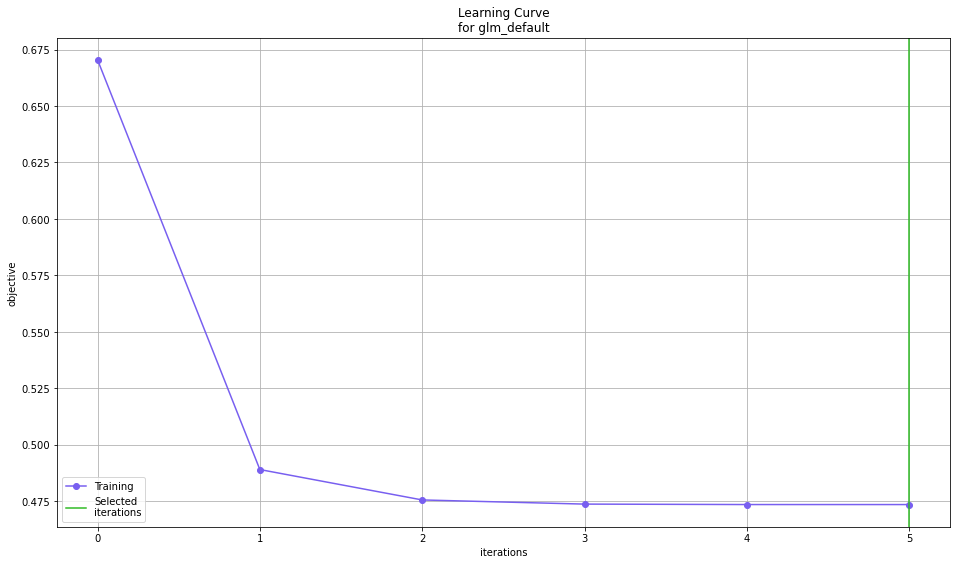

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

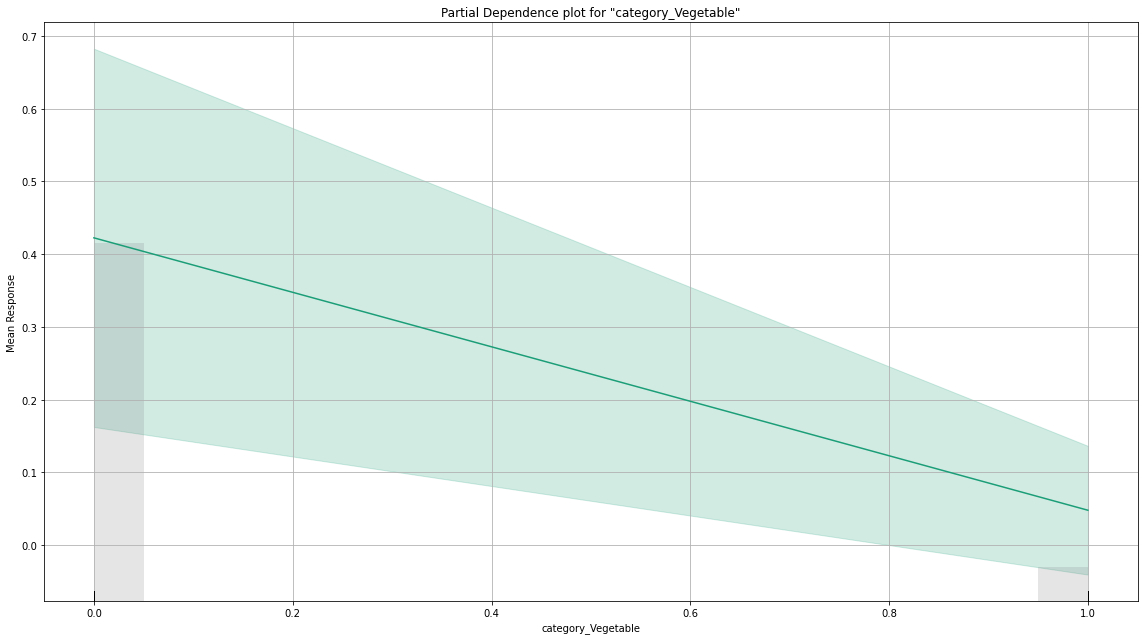

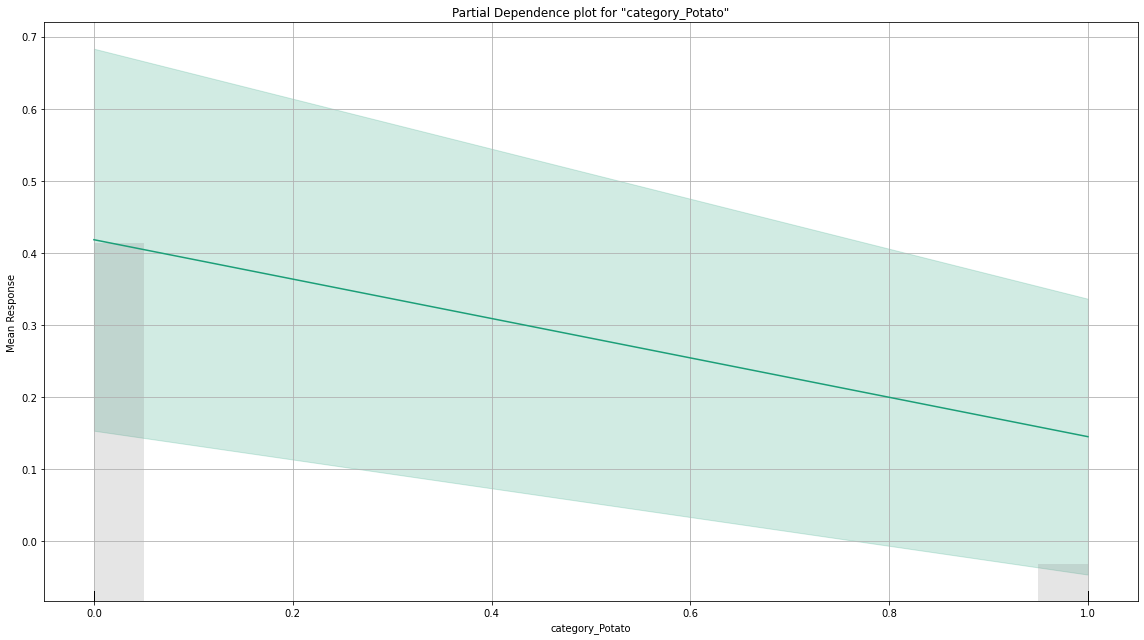

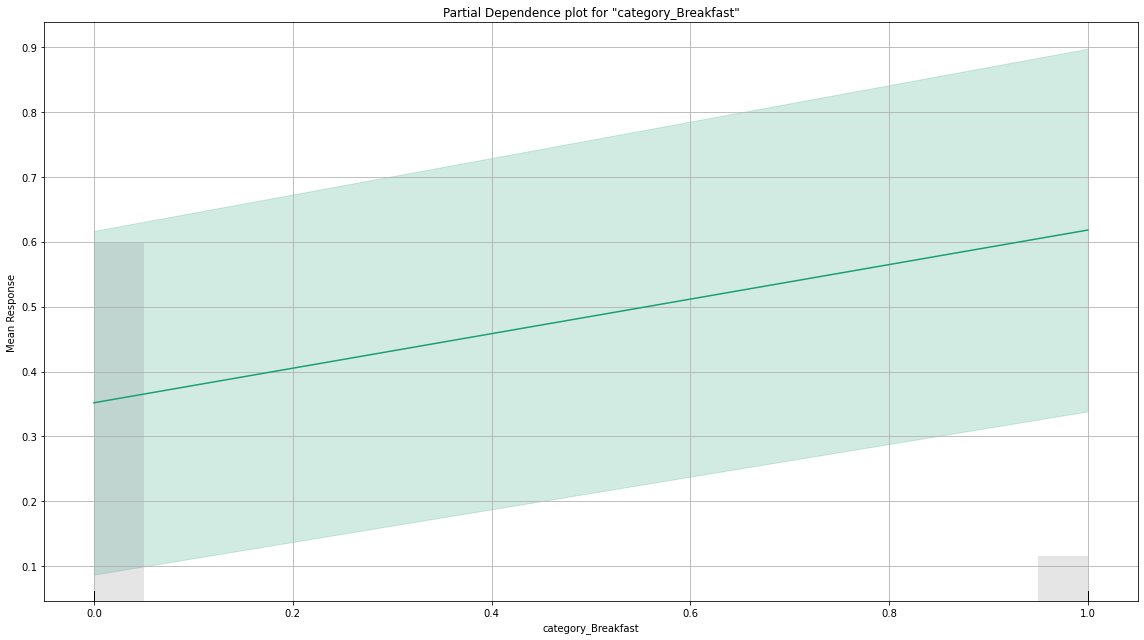

In [294]:
# Explanation
explanation = h2o.explain(glm, h2o_df)

In [272]:
#do automl with h2o to see a list of models and baselines 
import h2o
from h2o.automl import H2OAutoML
h2o.init()
h2o_df = h2o.H2OFrame(df)
h2o_df['high_traffic'] = h2o_df['high_traffic'].asfactor()
h2o_df.head()
aml = H2OAutoML(max_models=20, seed=1)
aml.train(y='high_traffic', training_frame=h2o_df)
lb = aml.leaderboard
lb.head(rows=lb.nrows)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  ---------------------------------------
H2O_cluster_uptime:         3 hours 11 mins
H2O_cluster_timezone:       Europe/Zurich
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.44.0.1
H2O_cluster_version_age:    1 day
H2O_cluster_name:           H2O_from_python_stephaniegessler_dy9dgg
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.200 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.9.12 final
--------------------------  ---------------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |████████████████████████████████████████████████████████Job request failed Unexpected HTTP error: ('Connection aborted.', BadStatusLine('GET /3/Jobs/$03017f00000132d4ffffffff$_92b9d20f4beb41a14e05655ff19f4ce5 HTTP/1.1\r\n')), will retry after 3s.
███████| (done) 100%


model_id                                                      auc    logloss     aucpr    mean_per_class_error      rmse       mse
-------------------------------------------------------  --------  ---------  --------  ----------------------  --------  --------
GLM_1_AutoML_3_20231017_230743                           0.815128   0.496449  0.736102                0.254596  0.408698  0.167034
StackedEnsemble_AllModels_1_AutoML_3_20231017_230743     0.812297   0.499604  0.728866                0.260694  0.410227  0.168286
StackedEnsemble_BestOfFamily_1_AutoML_3_20231017_230743  0.811501   0.500131  0.72913                 0.257746  0.410481  0.168495
GBM_2_AutoML_3_20231017_230743                           0.807213   0.518641  0.730221                0.270992  0.417383  0.174209
GBM_grid_1_AutoML_3_20231017_230743_model_2              0.806261   0.511859  0.719746                0.25808   0.414672  0.171953
DeepLearning_grid_1_AutoML_3_20231017_230743_model_1     0.802288   0.594738  0.721209                0.272879  0.432209  0.186805
GBM_5_AutoML_3_20231017_230743                           0.796583   0.523328  0.724206                0.306828  0.420297  0.17665
GBM_3_AutoML_3_20231017_230743                           0.79492    0.53227   0.708519                0.284063  0.423452  0.179312
DeepLearning_1_AutoML_3_20231017_230743                  0.793928   0.540076  0.718448                0.287403  0.425235  0.180825
DeepLearning_grid_2_AutoML_3_20231017_230743_model_1     0.793297   0.58818   0.70314                 0.294168  0.436319  0.190374
DeepLearning_grid_3_AutoML_3_20231017_230743_model_1     0.793122   0.625446  0.703201                0.276219  0.440022  0.193619
GBM_4_AutoML_3_20231017_230743                           0.789575   0.538025  0.704776                0.288486  0.427046  0.182368
DRF_1_AutoML_3_20231017_230743                           0.788895   0.538718  0.709968                0.2923    0.426559  0.181952
XGBoost_3_AutoML_3_20231017_230743                       0.786929   0.548545  0.7013                  0.302211  0.432178  0.186778
XGBoost_grid_1_AutoML_3_20231017_230743_model_2          0.782868   0.545613  0.710827                0.289159  0.430549  0.185373
GBM_grid_1_AutoML_3_20231017_230743_model_1              0.772727   0.548938  0.701421                0.302157  0.430835  0.185619
XGBoost_2_AutoML_3_20231017_230743                       0.767074   0.56527   0.691407                0.331896  0.438815  0.192558
XGBoost_grid_1_AutoML_3_20231017_230743_model_1          0.767004   0.564723  0.686437                0.300551  0.438117  0.191947
XGBoost_grid_1_AutoML_3_20231017_230743_model_3          0.766987   0.579439  0.690699                0.325726  0.444118  0.19724
XGBoost_1_AutoML_3_20231017_230743                       0.741299   0.583791  0.656285                0.304441  0.444452  0.197538
XRT_1_AutoML_3_20231017_230743                           0.712469   0.604205  0.622364                0.379137  0.456677  0.208554
GBM_1_AutoML_3_20231017_230743                           0.699069   0.608415  0.605352                0.374786  0.457933  0.209703
[22 rows x 7 columns]

In [ ]:
# 

Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  ---------------------------------------
H2O_cluster_uptime:         16 mins 04 secs
H2O_cluster_timezone:       Europe/Zurich
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.44.0.1
H2O_cluster_version_age:    1 day
H2O_cluster_name:           H2O_from_python_stephaniegessler_dy9dgg
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.208 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.9.12 final
--------------------------  ---------------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## glm_default

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.27996312137003315
       0    1    Error    Rate
-----  ---  ---  -------  -------------
0      339  235  0.4094   (235.0/574.0)
1      42   331  0.1126   (42.0/373.0)
Total  381  566  0.2925   (277.0/947.0)

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

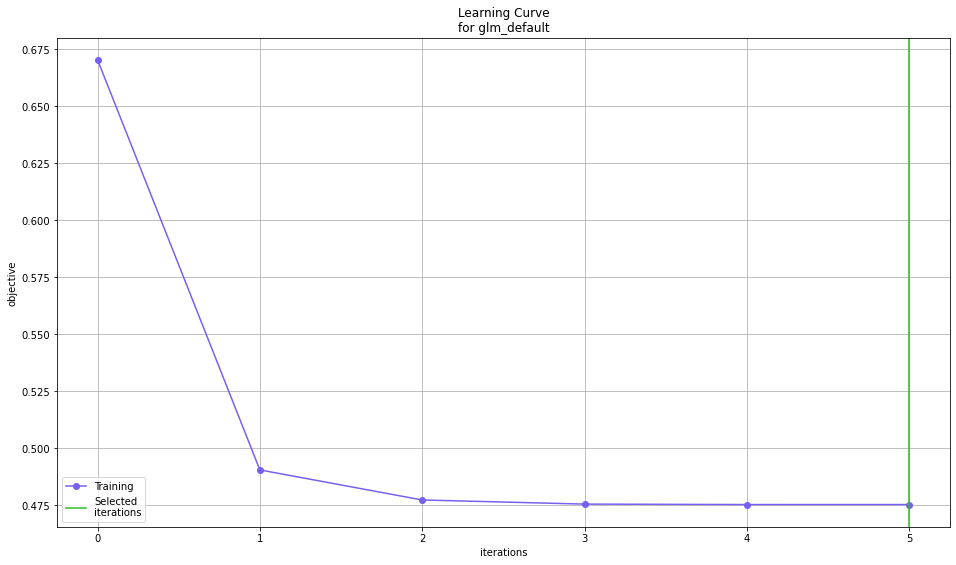

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

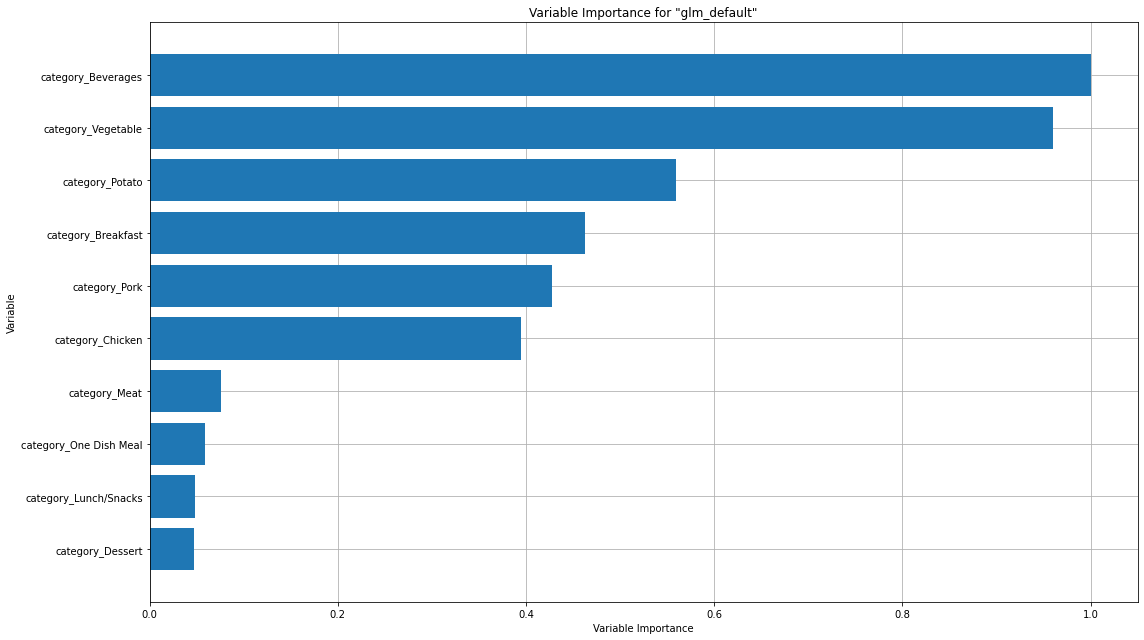

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

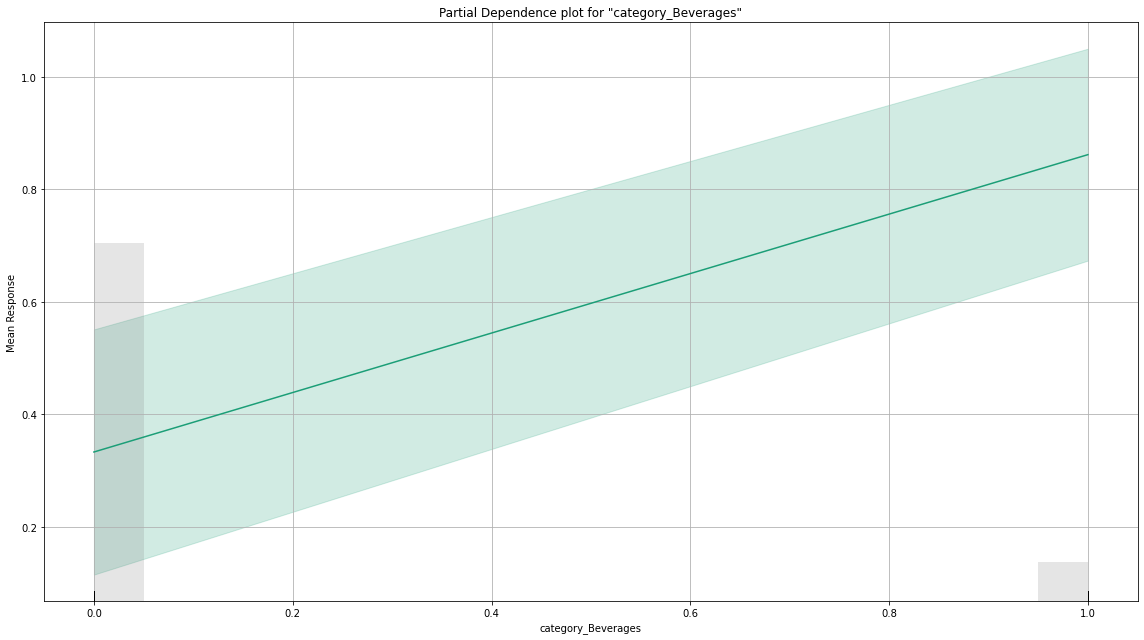

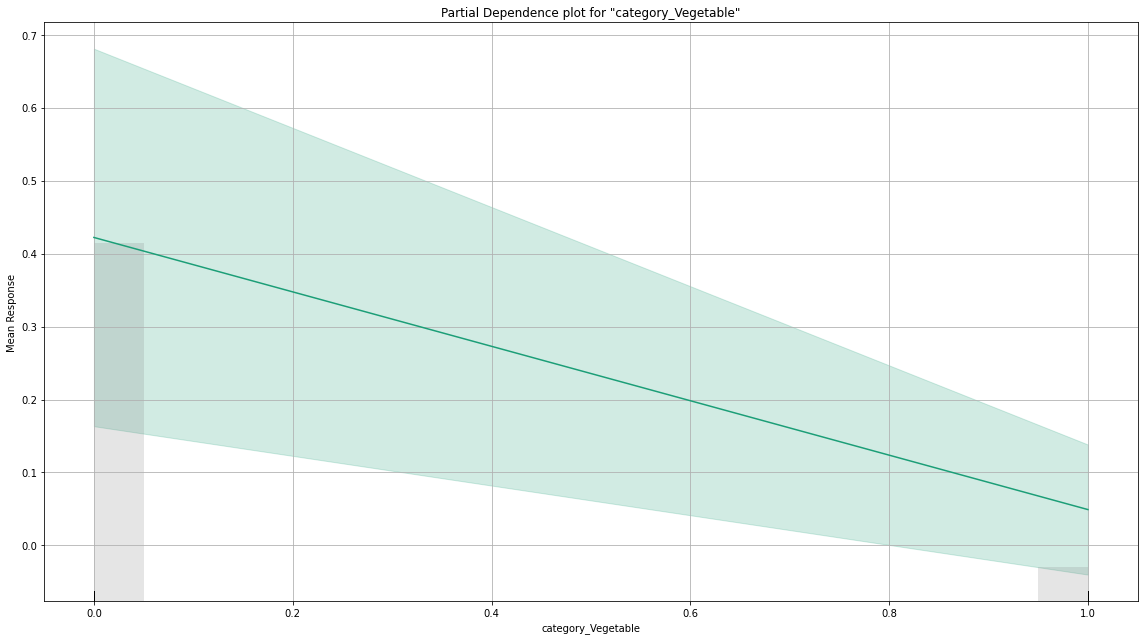

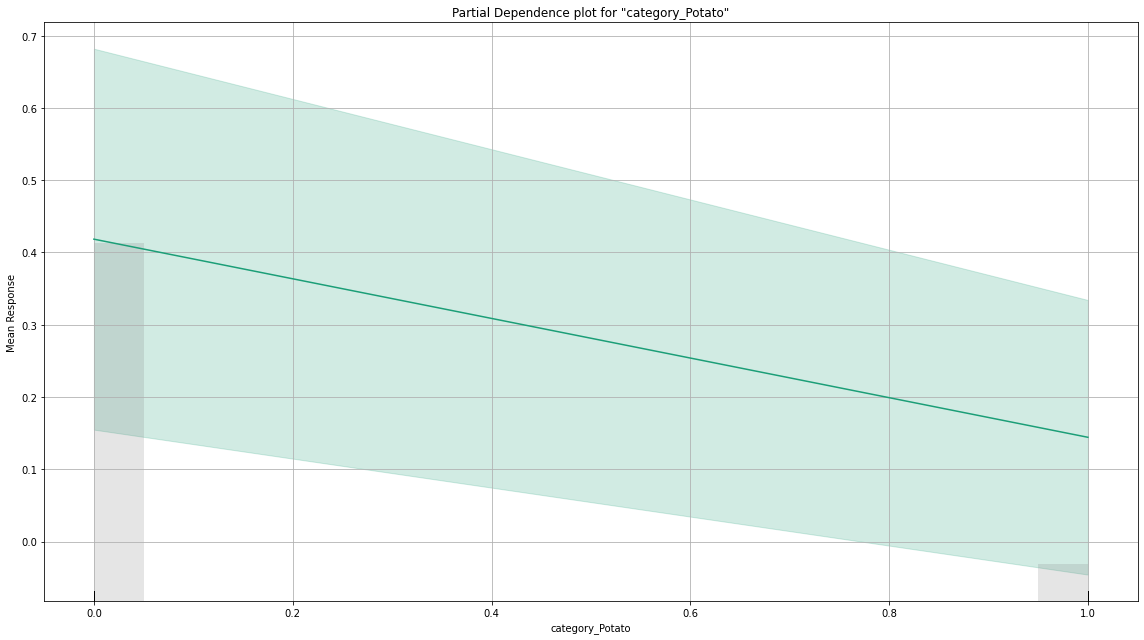

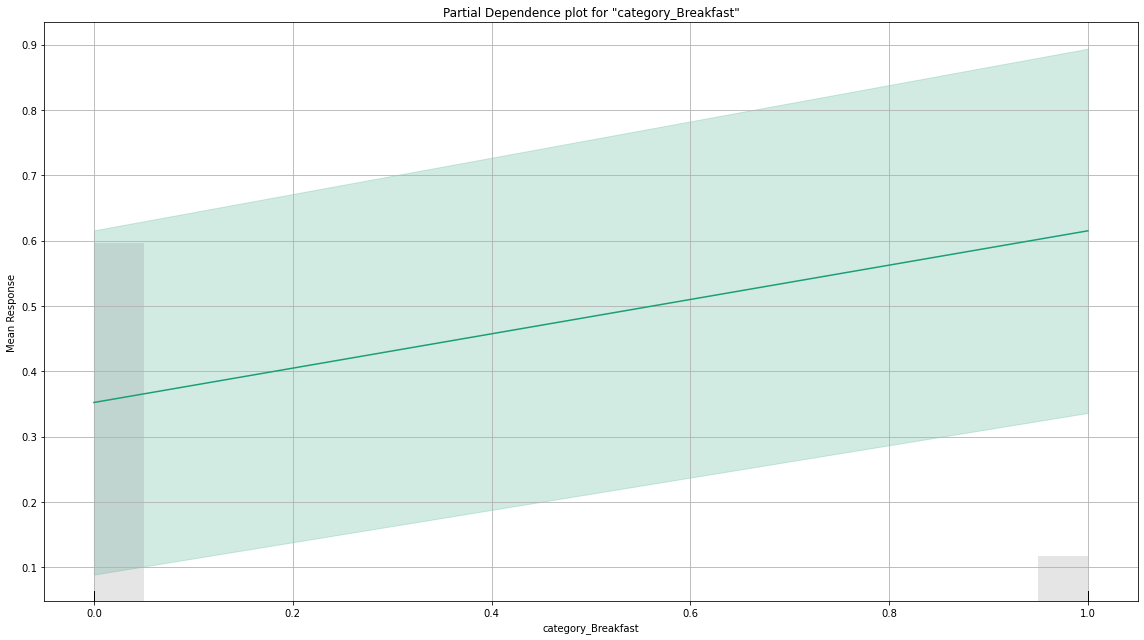

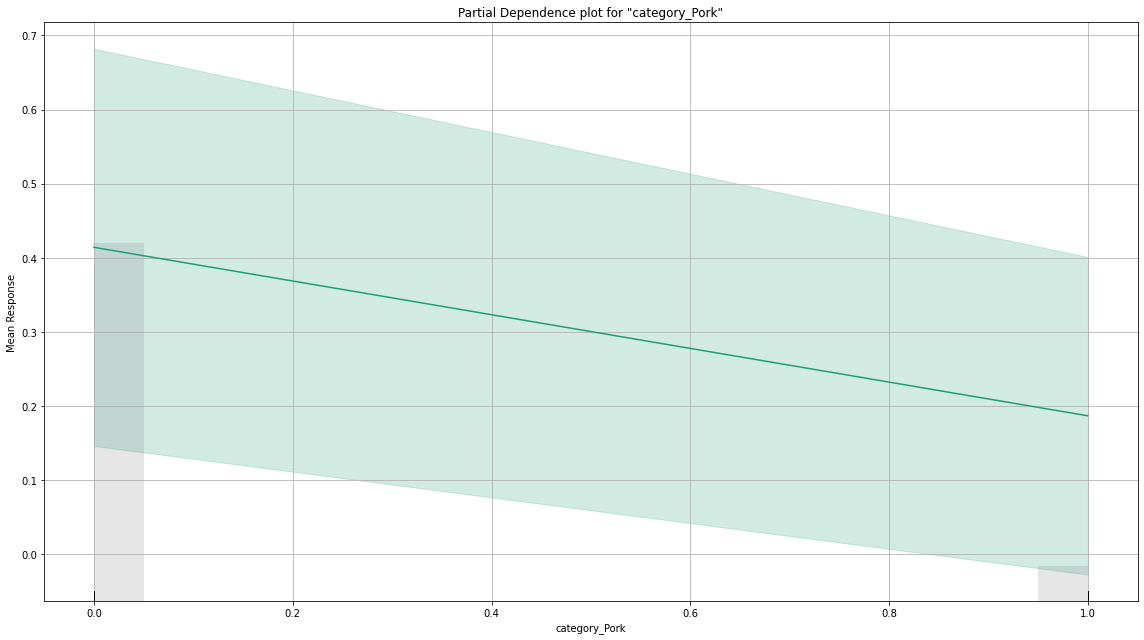

In [ ]:
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

h2o.init()

# Convert the dataframe to H2O Frame
h2o_df = h2o.H2OFrame(df)
h2o_df['high_traffic'] = h2o_df['high_traffic'].asfactor()

# Train a GLM model
glm = H2OGeneralizedLinearEstimator(family='binomial', model_id='glm_default')
glm.train(y='high_traffic', training_frame=h2o_df)

lb = aml.leaderboard
lb.head(rows=lb.nrows)

# Explanation
explanation = h2o.explain(glm, h2o_df)

In [ ]:
explain_model = aml.explain(frame = test, figsize = (8,6))

NameError: name 'test' is not defined

In [ ]:
pip install auto-sklearn


In [ ]:
import autosklearn.classification


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame containing the data
X = df.drop('high_traffic', axis=1)
y = df['high_traffic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
automl = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=600,
    per_run_time_limit=150,
    ensemble_size=1,
    memory_limit=None,  # Disabling memory limit
    metric=autosklearn.metrics.f1
)

automl.fit(X_train, y_train)

In [ ]:
print(automl.show_models())


In [ ]:
# Extract the results into a DataFrame
import pandas as pd
results_df = pd.DataFrame(automl.cv_results_)

# Display models and their F1 scores
for index, row in results_df.iterrows():
    model_name = row['params']['classifier:__choice__']
    f1_score = row['mean_test_score']
    print(f"Model: {model_name}, F1 Score: {f1_score:.4f}")


In [ ]:
unique_models = results_df['params'].apply(lambda x: x['classifier:__choice__']).unique()
print("Unique models evaluated:")
for model in unique_models:
    print(model)


In [ ]:
pip install pipelineprofiler

In [ ]:
import PipelineProfiler
# automl is an object Which has already been created.
profiler_data= PipelineProfiler.import_autosklearn(automl)
PipelineProfiler.plot_pipeline_matrix(profiler_data)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their possible values
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    "multi_class": ["auto", "ovr", "multinomial"]
}

# Initialize the Logistic Regression model
logreg = LogisticRegression(random_state=42, max_iter=5000)

# Set up the grid search
grid_search = GridSearchCV(logreg, param_grid, cv=10, scoring='f1')

# Fit the model using the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and the associated accuracy
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import Perceptron, SGDClassifier

# Define the list of models
model_list = [
    LogisticRegression(), 
    KNeighborsClassifier(),
    GaussianNB(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LinearSVC(),
    Perceptron(), 
    SGDClassifier(),
    ExtraTreesClassifier()

]

# Define a pipeline with a scaler and a placeholder for the classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # You can change this to MinMaxScaler() if needed
    ('classifier', LogisticRegression())  # Placeholder
])

# List to store F1 scores for each model
f1_scores = {}

# Iterate over each model, train it, and collect its F1 score
for model in model_list:
    # Set the classifier in the pipeline
    pipeline.set_params(classifier=model)
    
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = pipeline.predict(X_test)
    
    # Compute and store the F1 score
    f1_scores[type(model).__name__] = f1_score(y_test, y_pred)

f1_scores


In [ ]:
# scatterplot of calories vs. sugar
sns.regplot(x='calories', y='sugar', data=df, scatter=True)

In [ ]:
#scatterplot of calories vs. carbohydrates
sns.regplot(x='calories', y='carbohydrate', data=df, scatter=True)

In [ ]:
#scatterplot of calories vs. carbohydrates and color by high traffic
sns.lmplot(x='calories', y='carbohydrate', data=df, fit_reg=False, hue='high_traffic', legend=False)

In [ ]:
# plot bar chart  of calories, color change in bar with variable high_traffic
sns.barplot(x='calories', y='high_traffic', data=df)


In [ ]:
# Plotting the distribution of recipes across different categories
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='category', order=df['category'].value_counts().index, palette="viridis")
plt.title("Distribution of Recipes Across Categories")
plt.xlabel("Category")
plt.ylabel("Number of Recipes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
